In [1]:
import sys
import math
import numpy as np
import os
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import scipy as scp
from scipy import stats
from scipy.stats.mstats import chisquare
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.colors as colors
from glob import glob

In [2]:
import matplotlib as mpl
import seaborn as sns
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'
       
mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18

mpl.rc('axes', titlesize=20)
mpl.rc('legend', fontsize=16, frameon=False)

current_palette = sns.color_palette('colorblind', 10)

## Import data

In [3]:
df_part1 = pd.read_csv('survey_responses_part1.csv')
df_part2 = pd.read_csv('survey_responses_part2.csv')

In [4]:
cols1 = df_part1.columns.to_list()
for i in range(0,len(cols1)):
    print(i, cols1[i])

0 Respondant Number
1 Pick one in [30, 35]
2 [30,35], non-mimetic
3 Explanation (optional)
4 Pick one in [45, 50]
5 [45,50], non-mimetic
6 Explanation (optional)  
7 Pick one in [63,67]
8 [63,67], non-mimetic
9 Explanation (optional) 
10 Pick up to two in [0,10]
11 [0,10], non-mimetic
12 Explanation (optional)   
13 Pick up to two in [77, 87]
14 [77,87], non-mimetic
15 Explanation (optional)    


In [5]:
def get_data(df, icol):
    isString = type(np.array(df[df.columns[icol]].to_list())[0]) == np.str_
    data = np.array(df[df.columns[icol]].to_list())
    if isString:
        data = data[data != 'nan']
        data = data[data != ' ']
        data = data[data != '-']
    else:
        data = data[~np.isnan(data)]
    data = data.astype(int)
    return data

In [6]:
funny_num_30_35 = get_data(df_part1, 1)
funny_num_30_35_nm = get_data(df_part1, 2)
funny_num_45_50 = get_data(df_part1, 4)
funny_num_45_50_nm = get_data(df_part1, 5)
funny_num_63_67 = get_data(df_part1, 7)
funny_num_63_67_nm = get_data(df_part1, 8)

funny_num_0_10 = np.array(df_part1[df_part1.columns[10]].to_list())
funny_num_0_10 = funny_num_0_10[funny_num_0_10 != 'nan']
funny_num_0_10 = funny_num_0_10[funny_num_0_10 != ' ']
st = ''
for i in funny_num_0_10:
    st += i + ','
st = st[:-1]
funny_num_0_10 = np.array([int(i) for i in st.split(',')])

funny_num_0_10_nm = np.array(df_part1[df_part1.columns[11]].to_list())
funny_num_0_10_nm = funny_num_0_10_nm[funny_num_0_10_nm != 'nan']
funny_num_0_10_nm = funny_num_0_10_nm[funny_num_0_10_nm != ' ']
st = ''
for i in funny_num_0_10_nm:
    st += i + ','
st = st[:-1]
funny_num_0_10_nm = np.array([int(i) for i in st.split(',')])


funny_num_77_87 = np.array(df_part1[df_part1.columns[13]].to_list())
funny_num_77_87 = funny_num_77_87[funny_num_77_87 != 'nan']
funny_num_77_87 = funny_num_77_87[funny_num_77_87 != ' ']
st = ''
for i in funny_num_77_87:
    st += i + ','
st = st[:-1]
funny_num_77_87 = np.array([int(i) for i in st.split(',')])

funny_num_77_87_nm = np.array(df_part1[df_part1.columns[14]].to_list())
funny_num_77_87_nm = funny_num_77_87_nm[funny_num_77_87_nm != 'nan']
funny_num_77_87_nm = funny_num_77_87_nm[funny_num_77_87_nm != ' ']
st = ''
for i in funny_num_77_87_nm:
    st += i + ','
st = st[:-1]
funny_num_77_87_nm = np.array([int(i) for i in st.split(',')])

In [7]:
cols2 = df_part2.columns.to_list()
for i in range(0,len(cols2)):
    print(i, cols2[i])

0 Respondant Number
1 Pick one in [30, 35]
2 [30,35], non-mimetic
3 Pick one in [45, 50]
4 [45,50], non-mimetic
5 Pick one in [63,67]
6 [63,67], non-mimetic
7 Pick one in [0,10]
8 [0,10], non-mimetic
9 Pick one in [77, 87]
10 [77,87], non-mimetic
11 Optional: feel free to explain any of your answers here, and/or write general thoughts/reflections you might have.


In [8]:
funny_res_30_35 = get_data(df_part2, 1)
funny_res_30_35_nm = get_data(df_part2, 2)
funny_res_45_50 = get_data(df_part2, 3)
funny_res_45_50_nm = get_data(df_part2, 4)
funny_res_63_67 = get_data(df_part2, 5)
funny_res_63_67_nm = get_data(df_part2, 6)
funny_res_0_10 = get_data(df_part2, 7)
funny_res_0_10_nm = get_data(df_part2, 8)
funny_res_77_87 = get_data(df_part2, 9)
funny_res_77_87_nm = get_data(df_part2, 10)

## Go through each range

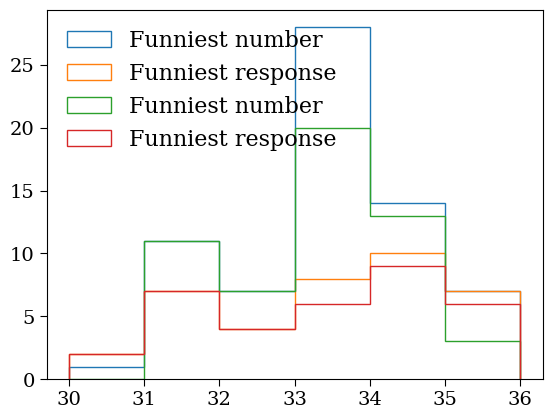

In [9]:
plt.figure()
den = False
fn_3035_counts, fn_3035_bins, _ = plt.hist(funny_num_30_35, bins=6, range=(30,36), density=den, 
                                           histtype='step', label="Funniest number");
fr_3035_counts, fr_3035_bins, _ = plt.hist(funny_res_30_35, bins=6, range=(30,36), density=den, 
                                           histtype='step', label="Funniest response");
fn_3035_counts_nm, fn_3035_bins_nm, _ = plt.hist(funny_num_30_35_nm, bins=6, range=(30,36), density=den, 
                                           histtype='step', label="Funniest number");
fr_3035_counts_nm, fr_3035_bins_nm, _ = plt.hist(funny_res_30_35_nm, bins=6, range=(30,36), density=den, 
                                           histtype='step', label="Funniest response");
plt.legend()
plt.show();

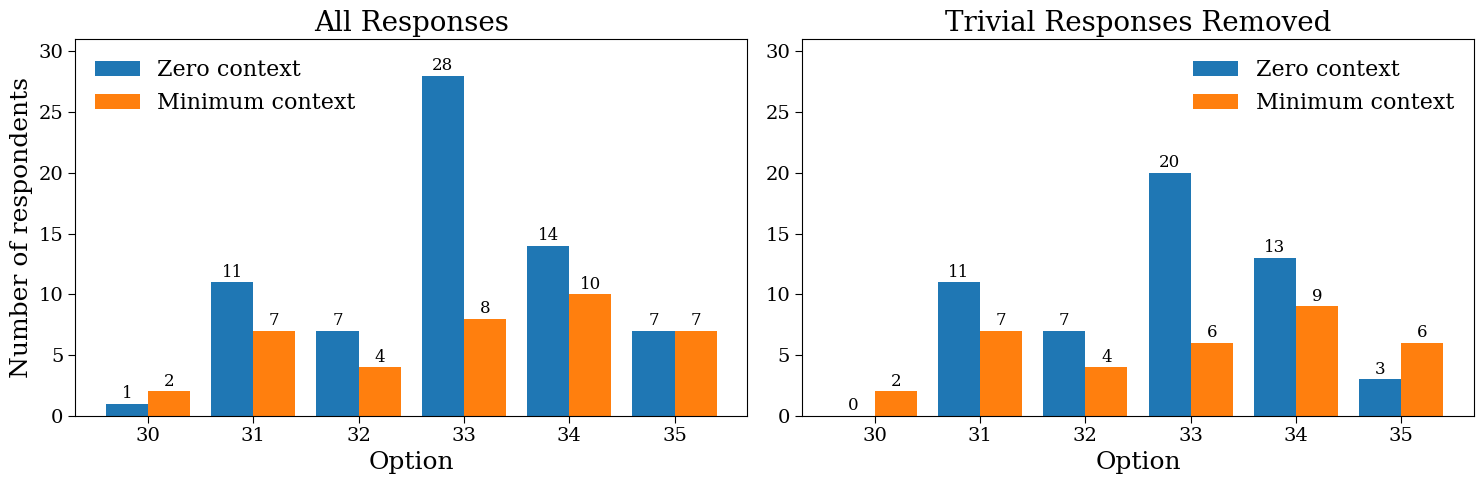

In [10]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
x_3035=np.array([30,31,32,33,34,35])
a=1
bars_fn3035 = ax[0].bar(x=x_3035-0.2, height=fn_3035_counts, width=0.4, alpha=a, label="Zero context")
bars_fr3035 = ax[0].bar(x=x_3035+0.2, height=fr_3035_counts, width=0.4, alpha=a, label="Minimum context")
ax[0].bar_label(bars_fn3035, labels=fn_3035_counts.astype(int), padding=1)
ax[0].bar_label(bars_fr3035, labels=fr_3035_counts.astype(int), padding=1)
ax[0].set_ylabel("Number of respondents")
ax[0].set_title("All Responses")

bars_fn3035_nm = ax[1].bar(x=x_3035-0.2, height=fn_3035_counts_nm, width=0.4, alpha=a, label="Zero context")
bars_fr3035_nm = ax[1].bar(x=x_3035+0.2, height=fr_3035_counts_nm, width=0.4, alpha=a, label="Minimum context")
ax[1].bar_label(bars_fn3035_nm, labels=fn_3035_counts_nm.astype(int), padding=1)
ax[1].bar_label(bars_fr3035_nm, labels=fr_3035_counts_nm.astype(int), padding=1)
ax[1].set_title("Trivial Responses Removed")
for i in range(0,2):
    ax[i].set_ylim(0,31)
    ax[i].set_xlabel("Option")
    ax[i].legend()
fig.tight_layout();
plt.show();

In [11]:
print("[30,35], zero context:")
print("N:", len(funny_num_30_35))
print("Mean:", np.mean(funny_num_30_35))
print("Median:", np.median(funny_num_30_35))
print("Mode:", stats.mode(funny_num_30_35, keepdims=False))
print("Std:", np.std(funny_num_30_35))

print()

print("[30,35], minimum context:")
print("N:", len(funny_res_30_35))
print("Mean:", np.mean(funny_res_30_35))
print("Median:", np.median(funny_res_30_35))
print("Mode:", stats.mode(funny_res_30_35, keepdims=False))
print("Std:", np.std(funny_res_30_35))

[30,35], zero context:
N: 68
Mean: 32.94117647058823
Median: 33.0
Mode: ModeResult(mode=33, count=28)
Std: 1.2233314319462014

[30,35], minimum context:
N: 38
Mean: 33.0
Median: 33.0
Mode: ModeResult(mode=34, count=10)
Std: 1.5217718205053643


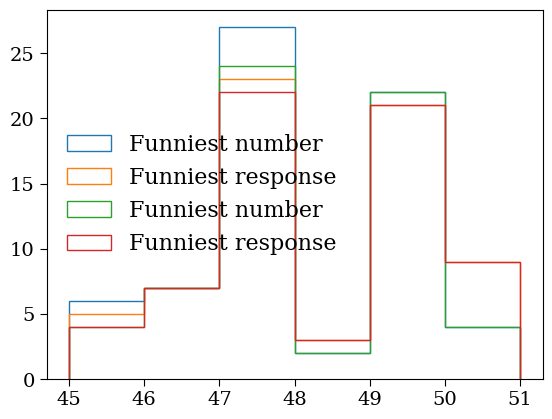

In [12]:
plt.figure()
den = False
fn_4550_counts, fn_4550_bins, _ = plt.hist(funny_num_45_50, bins=6, range=(45,51), density=den, 
                                           histtype='step', label="Funniest number");
fr_4550_counts, fr_4550_bins, _ = plt.hist(funny_res_45_50, bins=6, range=(45,51), density=den, 
                                           histtype='step', label="Funniest response");
fn_4550_counts_nm, fn_4550_bins_nm, _ = plt.hist(funny_num_45_50_nm, bins=6, range=(45,51), density=den, 
                                           histtype='step', label="Funniest number");
fr_4550_counts_nm, fr_4550_bins_nm, _ = plt.hist(funny_res_45_50_nm, bins=6, range=(45,51), density=den, 
                                           histtype='step', label="Funniest response");
plt.legend();
plt.show()

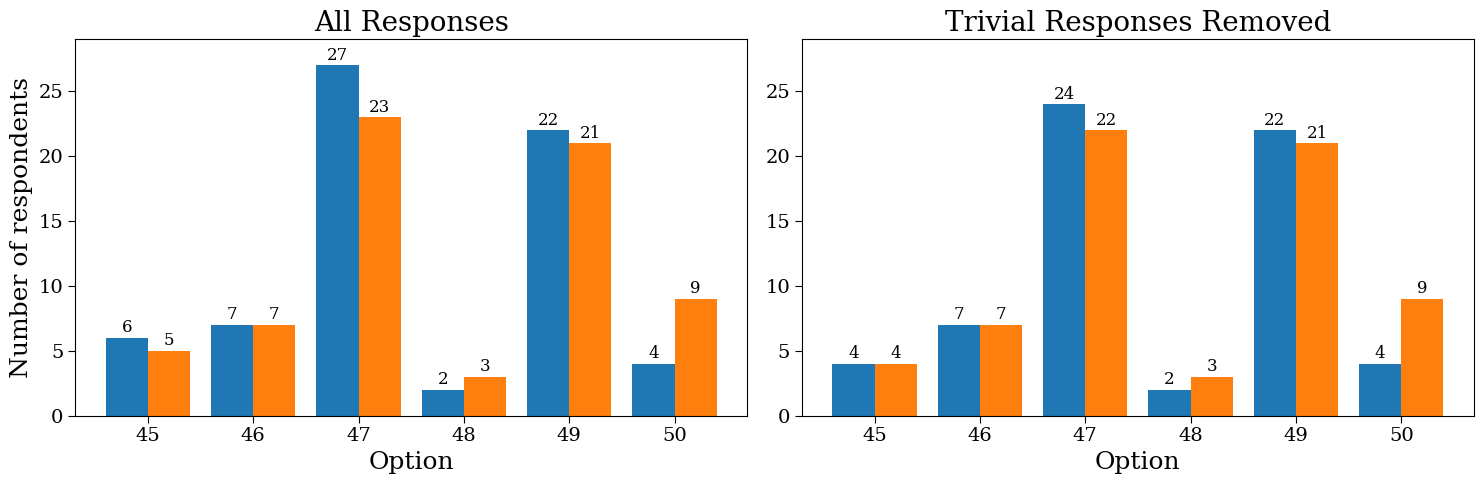

In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
x_4550=np.array([45,46,47,48,49,50])
a=1
bars_fn4550 = ax[0].bar(x=x_4550-0.2, height=fn_4550_counts, width=0.4, alpha=a, label="Zero context")
bars_fr4550 = ax[0].bar(x=x_4550+0.2, height=fr_4550_counts, width=0.4, alpha=a, label="Minimum context")
ax[0].bar_label(bars_fn4550, labels=fn_4550_counts.astype(int), padding=1)
ax[0].bar_label(bars_fr4550, labels=fr_4550_counts.astype(int), padding=1)
ax[0].set_ylabel("Number of respondents")
ax[0].set_title("All Responses")
bars_fn4550_nm = ax[1].bar(x=x_4550-0.2, height=fn_4550_counts_nm, width=0.4, alpha=a, label="Zero context")
bars_fr4550_nm = ax[1].bar(x=x_4550+0.2, height=fr_4550_counts_nm, width=0.4, alpha=a, label="Minimum context")
ax[1].bar_label(bars_fn4550_nm, labels=fn_4550_counts_nm.astype(int), padding=1)
ax[1].bar_label(bars_fr4550_nm, labels=fr_4550_counts_nm.astype(int), padding=1)
ax[1].set_title("Trivial Responses Removed")
for i in range(0,2):
    ax[i].set_xlabel("Option")
    ax[i].set_ylim(0,29)
fig.tight_layout();

plt.show()

In [14]:
print("[45,50], zero context:")
print("N:", len(funny_num_45_50))
print("Mean:", np.mean(funny_num_45_50))
print("Median:", np.median(funny_num_45_50))
print("Mode:", stats.mode(funny_num_45_50, keepdims=False))
print("Std:", np.std(funny_num_45_50))

print()

print("[45,50], minimum context:")
print("N:", len(funny_res_45_50))
print("Mean:", np.mean(funny_res_45_50))
print("Median:", np.median(funny_res_45_50))
print("Mode:", stats.mode(funny_res_45_50, keepdims=False))
print("Std:", np.std(funny_res_45_50))

[45,50], zero context:
N: 68
Mean: 47.5735294117647
Median: 47.0
Mode: ModeResult(mode=47, count=27)
Std: 1.4070847676144445

[45,50], minimum context:
N: 68
Mean: 47.80882352941177
Median: 47.0
Mode: ModeResult(mode=47, count=23)
Std: 1.487767306097773


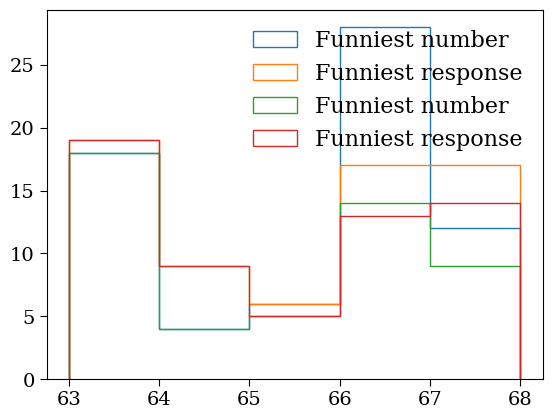

In [15]:
plt.figure()
den = False
fn_6367_counts, fn_6367_bins, _ = plt.hist(funny_num_63_67, bins=5, range=(63,68), density=den, 
                                           histtype='step', label="Funniest number");
fr_6367_counts, fr_6367_bins, _ = plt.hist(funny_res_63_67, bins=5, range=(63,68), density=den, 
                                           histtype='step', label="Funniest response");
fn_6367_counts_nm, fn_6367_bins_nm, _ = plt.hist(funny_num_63_67_nm, bins=5, range=(63,68), density=den, 
                                           histtype='step', label="Funniest number");
fr_6367_counts_nm, fr_6367_bins_nm, _ = plt.hist(funny_res_63_67_nm, bins=5, range=(63,68), density=den, 
                                           histtype='step', label="Funniest response");

plt.legend()
plt.show();

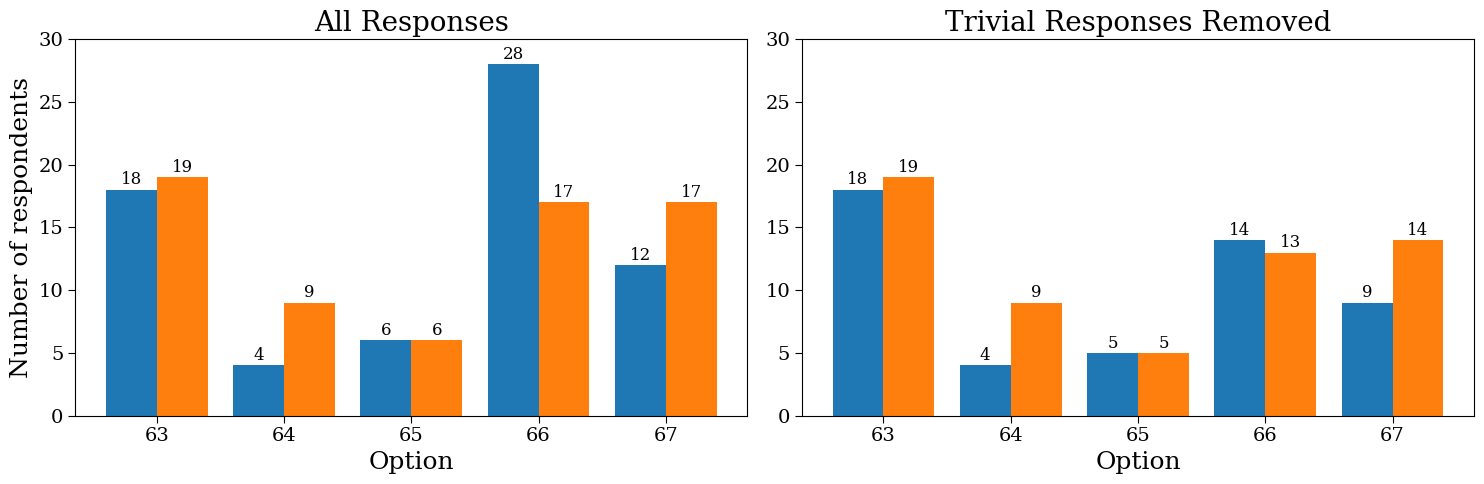

In [16]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

x_6367=np.array([63,64,65,66,67])
a=1
bars_fn6367 = ax[0].bar(x=x_6367-0.2, height=fn_6367_counts, width=0.4, alpha=a, label="Zero context")
bars_fr6367 = ax[0].bar(x=x_6367+0.2, height=fr_6367_counts, width=0.4, alpha=a, label="Minimum context")
ax[0].bar_label(bars_fn6367, labels=fn_6367_counts.astype(int), padding=1)
ax[0].bar_label(bars_fr6367, labels=fr_6367_counts.astype(int), padding=1)
ax[0].set_ylabel("Number of respondents")
ax[0].set_title("All Responses")

bars_fn6367_nm = ax[1].bar(x=x_6367-0.2, height=fn_6367_counts_nm, width=0.4, alpha=a, label="Zero context")
bars_fr6367_nm = ax[1].bar(x=x_6367+0.2, height=fr_6367_counts_nm, width=0.4, alpha=a, label="Minimum context")
ax[1].bar_label(bars_fn6367_nm, labels=fn_6367_counts_nm.astype(int), padding=1)
ax[1].bar_label(bars_fr6367_nm, labels=fr_6367_counts_nm.astype(int), padding=1)
ax[1].set_title("Trivial Responses Removed")
for i in range(0,2):
    ax[i].set_xlabel("Option")
    ax[i].set_ylim(0, 30)

fig.tight_layout();

plt.show();

In [17]:
print("[63,67], zero context:")
print("N:", len(funny_num_63_67))
print("Mean:", np.mean(funny_num_63_67))
print("Median:", np.median(funny_num_63_67))
print("Mode:", stats.mode(funny_num_63_67, keepdims=False))
print("Std:", np.std(funny_num_63_67))

print()

print("[63,67], minimum context:")
print("N:", len(funny_res_63_67))
print("Mean:", np.mean(funny_res_63_67))
print("Median:", np.median(funny_res_63_67))
print("Mode:", stats.mode(funny_res_63_67, keepdims=False))
print("Std:", np.std(funny_res_63_67))

[63,67], zero context:
N: 68
Mean: 65.17647058823529
Median: 66.0
Mode: ModeResult(mode=66, count=28)
Std: 1.484638760485172

[63,67], minimum context:
N: 68
Mean: 65.05882352941177
Median: 65.5
Mode: ModeResult(mode=63, count=19)
Std: 1.5800442374780341


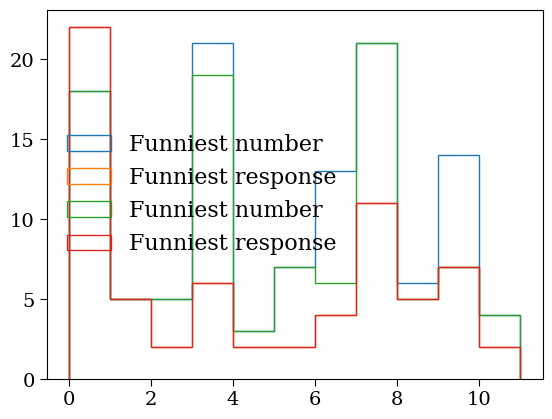

In [18]:
plt.figure()
fn_010_counts, fn_010_bins, _ = plt.hist(funny_num_0_10, bins=11, range=(0,11), density=False, 
                                           histtype='step', label="Funniest number");
fr_010_counts, fr_010_bins, _ = plt.hist(funny_res_0_10, bins=11, range=(0,11), density=False, 
                                           histtype='step', label="Funniest response");
fn_010_counts_nm, fn_010_bins_nm, _ = plt.hist(funny_num_0_10_nm, bins=11, range=(0,11), density=False, 
                                           histtype='step', label="Funniest number");
fr_010_counts_nm, fr_010_bins_nm, _ = plt.hist(funny_res_0_10_nm, bins=11, range=(0,11), density=False, 
                                           histtype='step', label="Funniest response");
plt.legend();
plt.show()

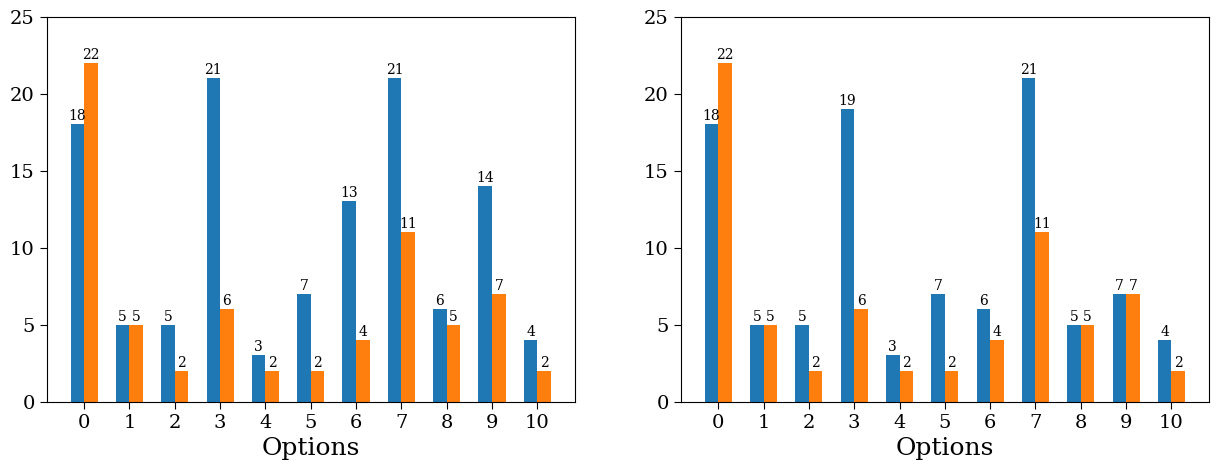

In [19]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
x_010=np.array([0,1,2,3,4,5,6,7,8,9,10])
a=1
fs=10
bars_fn010 = ax[0].bar(x=x_010-0.15, height=fn_010_counts, width=0.3, alpha=a, label="Zero context")
bars_fr010 = ax[0].bar(x=x_010+0.15, height=fr_010_counts, width=0.3, alpha=a, label="Minimum context")
ax[0].bar_label(bars_fn010, labels=fn_010_counts.astype(int), padding=1,fontsize=fs)
ax[0].bar_label(bars_fr010, labels=fr_010_counts.astype(int), padding=1, fontsize=fs)

bars_fn010_nm = ax[1].bar(x=x_010-0.15, height=fn_010_counts_nm, width=0.3, alpha=a, label="Zero context")
bars_fr010_nm = ax[1].bar(x=x_010+0.15, height=fr_010_counts_nm, width=0.3, alpha=a, label="Minimum context")
ax[1].bar_label(bars_fn010_nm, labels=fn_010_counts_nm.astype(int), padding=1, fontsize=fs)
ax[1].bar_label(bars_fr010_nm, labels=fr_010_counts_nm.astype(int), padding=1, fontsize=fs)

for i in range(0,2):
    ax[i].set_ylim(0,25)
    ax[i].set_xlabel("Options")
    ax[i].set_xticks(x_010)
plt.show();

In [20]:
print("[0,10], zero context:")
print("N:", len(funny_num_0_10))
print("Mean:", np.mean(funny_num_0_10))
print("Median:", np.median(funny_num_0_10))
print("Mode:", stats.mode(funny_num_0_10, keepdims=False))
print("Std:", np.std(funny_num_0_10))

print()

print("[0,10], minimum context:")
print("N:", len(funny_res_0_10))
print("Mean:", np.mean(funny_res_0_10))
print("Median:", np.median(funny_res_0_10))
print("Mode:", stats.mode(funny_res_0_10, keepdims=False))
print("Std:", np.std(funny_res_0_10))

[0,10], zero context:
N: 117
Mean: 4.82051282051282
Median: 5.0
Mode: ModeResult(mode=3, count=21)
Std: 3.1121910401433346

[0,10], minimum context:
N: 68
Mean: 3.9558823529411766
Median: 3.0
Mode: ModeResult(mode=0, count=22)
Std: 3.5456428253537746


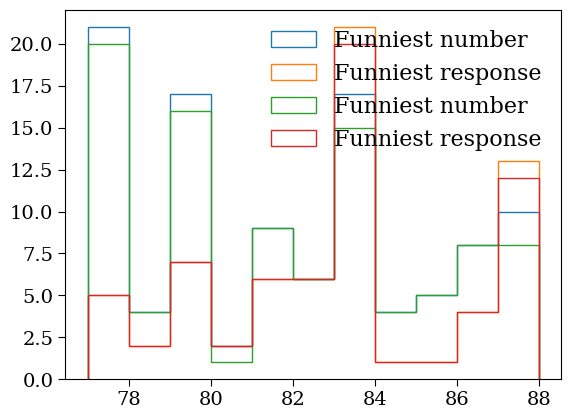

In [21]:
plt.figure()
fn_7787_counts, fn_7787_bins, _ = plt.hist(funny_num_77_87, bins=11, range=(77,88), density=False, 
                                           histtype='step', label="Funniest number");
fr_7787_counts, fr_7787_bins, _ = plt.hist(funny_res_77_87, bins=11, range=(77,88), density=False, 
                                           histtype='step', label="Funniest response");
fn_7787_counts_nm, fn_7787_bins_nm, _ = plt.hist(funny_num_77_87_nm, bins=11, range=(77,88), density=False, 
                                           histtype='step', label="Funniest number");
fr_7787_counts_nm, fr_7787_bins_nm, _ = plt.hist(funny_res_77_87_nm, bins=11, range=(77,88), density=False, 
                                           histtype='step', label="Funniest response");
plt.legend()
plt.show();

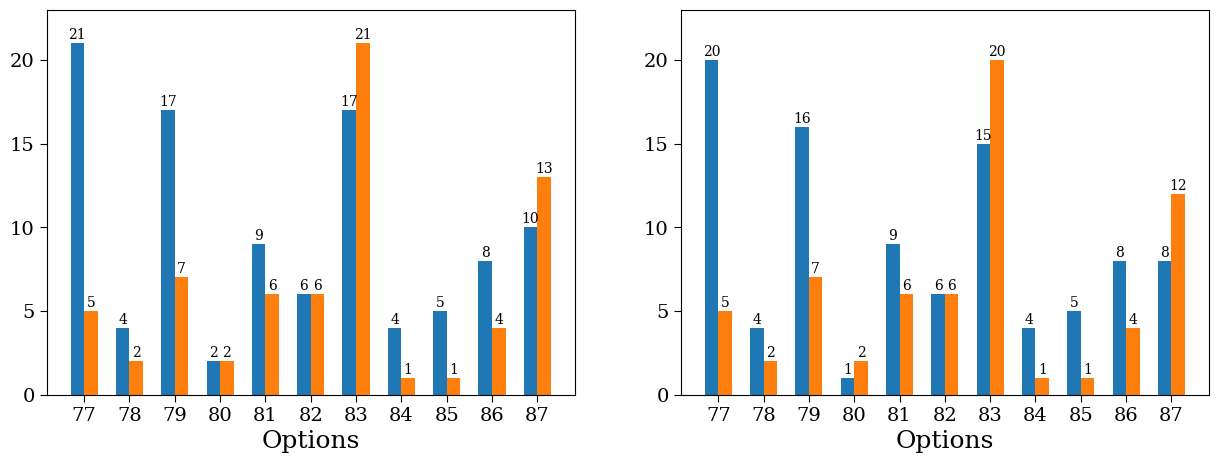

In [22]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
x_7787=np.array([77,78,79,80,81,82,83,84,85,86,87])
a=1
bars_fn7787 = ax[0].bar(x=x_7787-0.15, height=fn_7787_counts, width=0.3, alpha=a, label="Zero context")
bars_fr7787 = ax[0].bar(x=x_7787+0.15, height=fr_7787_counts, width=0.3, alpha=a, label="Minimum context")
ax[0].bar_label(bars_fn7787, labels=fn_7787_counts.astype(int), padding=1, fontsize=fs)
ax[0].bar_label(bars_fr7787, labels=fr_7787_counts.astype(int), padding=1, fontsize=fs)
bars_fn7787_nm = ax[1].bar(x=x_7787-0.15, height=fn_7787_counts_nm, width=0.3, alpha=a, label="Zero context")
bars_fr7787_nm = ax[1].bar(x=x_7787+0.15, height=fr_7787_counts_nm, width=0.3, alpha=a, label="Minimum context")
ax[1].bar_label(bars_fn7787_nm, labels=fn_7787_counts_nm.astype(int), padding=1, fontsize=fs)
ax[1].bar_label(bars_fr7787_nm, labels=fr_7787_counts_nm.astype(int), padding=1, fontsize=fs)

for i in range(0,2):
    ax[i].set_xlabel("Options")
    ax[i].set_xticks(x_7787)
    ax[i].set_ylim(0,23)
plt.show();

In [23]:
print("[77,87], zero context:")
print("N:", len(funny_num_77_87))
print("Mean:", np.mean(funny_num_77_87))
print("Median:", np.median(funny_num_77_87))
print("Mode:", stats.mode(funny_num_77_87, keepdims=False))
print("Std:", np.std(funny_num_77_87))

print()

print("[77,87], minimum context:")
print("N:", len(funny_res_77_87))
print("Mean:", np.mean(funny_res_77_87))
print("Median:", np.median(funny_res_77_87))
print("Mode:", stats.mode(funny_res_77_87, keepdims=False))
print("Std:", np.std(funny_res_77_87))

[77,87], zero context:
N: 103
Mean: 81.3883495145631
Median: 81.0
Mode: ModeResult(mode=77, count=21)
Std: 3.379644979656766

[77,87], minimum context:
N: 68
Mean: 82.63235294117646
Median: 83.0
Mode: ModeResult(mode=83, count=21)
Std: 3.043336074716005


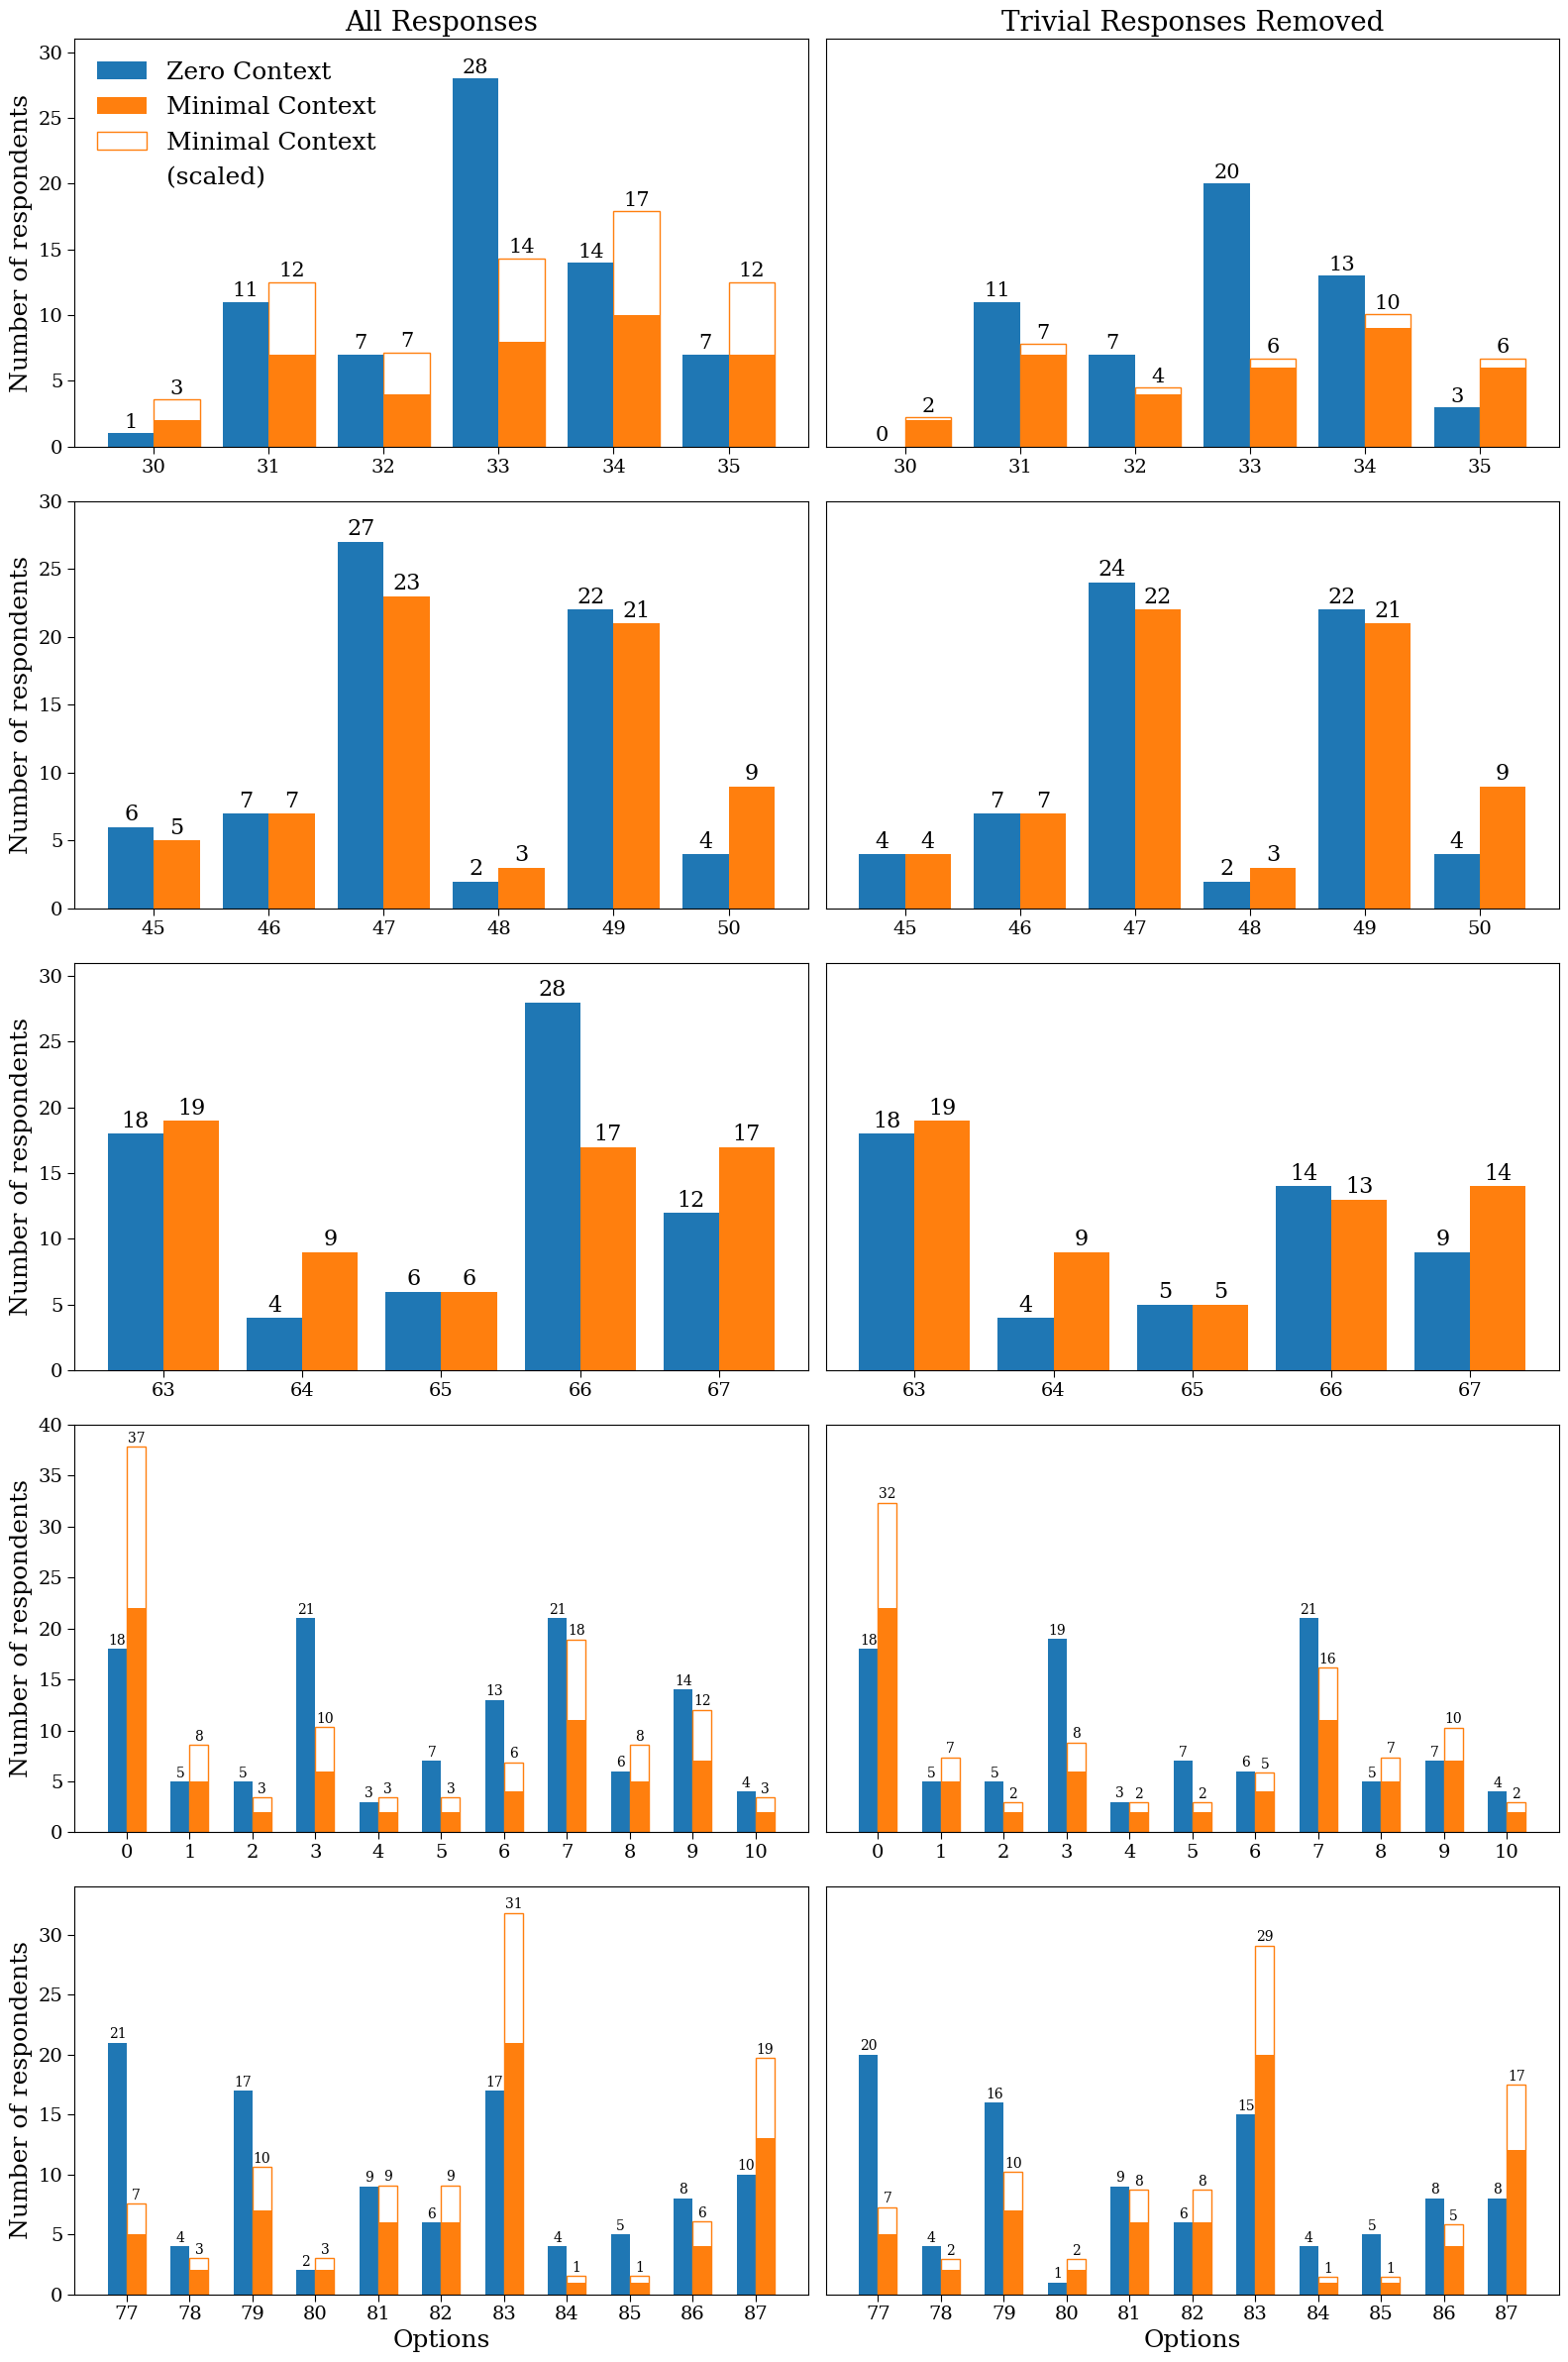

In [24]:
fig, ax = plt.subplots(5, 2, figsize=(16,24))

tot_fn3035 = len(funny_num_30_35)
tot_fn3035_nm = len(funny_num_30_35_nm)
tot_fr3035 = len(funny_res_30_35)
tot_fr3035_nm = len(funny_res_30_35_nm)

ax[0][0].plot([], color='none', label="(scaled)")
bars_fr3035_scaled = ax[0][0].bar(x=x_3035+0.2, height=(fr_3035_counts/tot_fr3035)*tot_fn3035, width=0.4, 
                                  alpha=a, edgecolor='C1', facecolor='none', label="Minimal Context")
bars_fr3035 = ax[0][0].bar(x=x_3035+0.2, height=fr_3035_counts, color='C1', width=0.4, alpha=a, label="Minimal Context")


ax[0][0].bar_label(bars_fr3035_scaled, labels=((fr_3035_counts/tot_fr3035)*tot_fn3035).astype(int), 
                   padding=1, fontsize=15)

bars_fn3035 = ax[0][0].bar(x=x_3035-0.2, height=fn_3035_counts, width=0.4, color='C0',alpha=a, label="Zero Context")
ax[0][0].bar_label(bars_fn3035, labels=fn_3035_counts.astype(int), padding=1, fontsize=15)

# ax[0][0].set_ylabel("Number of respondents")
ax[0][0].set_title("All Responses")
ax[0][0].legend(fontsize=18, loc='upper left', reverse=True)

bars_fn3035_nm = ax[0][1].bar(x=x_3035-0.2, height=fn_3035_counts_nm, width=0.4, 
                              alpha=a)

bars_fr3035_nm0 = ax[0][1].bar(x=x_3035+0.2, height=fr_3035_counts_nm, width=0.4, 
                              alpha=a)

bars_fr3035_nm = ax[0][1].bar(x=x_3035+0.2, height=(fr_3035_counts_nm/tot_fr3035_nm)*tot_fr3035, width=0.4, 
                              alpha=a, edgecolor='C1', facecolor='none', label="Minimal context,\n scaled")
ax[0][1].bar_label(bars_fn3035_nm, labels=fn_3035_counts_nm.astype(int), 
                                padding=1, fontsize=15)
ax[0][1].bar_label(bars_fr3035_nm, labels=((fr_3035_counts_nm/tot_fr3035_nm)*tot_fr3035).astype(int), 
                           padding=1, fontsize=15)
ax[0][1].set_title("Trivial Responses Removed")

for i in range(0,2):
    ax[0][i].set_ylim(0,31)


    
bars_fn4550 = ax[1][0].bar(x=x_4550-0.2, height=fn_4550_counts, width=0.4, alpha=a, label="Zero context")
bars_fr4550 = ax[1][0].bar(x=x_4550+0.2, height=fr_4550_counts, width=0.4, alpha=a, label="Minimal context")
ax[1][0].bar_label(bars_fn4550, labels=fn_4550_counts.astype(int), padding=1, fontsize=16)
ax[1][0].bar_label(bars_fr4550, labels=fr_4550_counts.astype(int), padding=1, fontsize=16)
bars_fn4550_nm = ax[1][1].bar(x=x_4550-0.2, height=fn_4550_counts_nm, width=0.4, alpha=a, label="Zero context")
bars_fr4550_nm = ax[1][1].bar(x=x_4550+0.2, height=fr_4550_counts_nm, width=0.4, alpha=a, label="Minimal context")
ax[1][1].bar_label(bars_fn4550_nm, labels=fn_4550_counts_nm.astype(int), padding=1, fontsize=16)
ax[1][1].bar_label(bars_fr4550_nm, labels=fr_4550_counts_nm.astype(int), padding=1, fontsize=16)
for i in range(0,2):
    ax[1][i].set_ylim(0,30)
    
    
    
bars_fn6367 = ax[2][0].bar(x=x_6367-0.2, height=fn_6367_counts, width=0.4, alpha=a, label="Zero context")
bars_fr6367 = ax[2][0].bar(x=x_6367+0.2, height=fr_6367_counts, width=0.4, alpha=a, label="Minimal context")
ax[2][0].bar_label(bars_fn6367, labels=fn_6367_counts.astype(int), padding=1, fontsize=16)
ax[2][0].bar_label(bars_fr6367, labels=fr_6367_counts.astype(int), padding=1, fontsize=16)

bars_fn6367_nm = ax[2][1].bar(x=x_6367-0.2, height=fn_6367_counts_nm, width=0.4, alpha=a, label="Zero context")
bars_fr6367_nm = ax[2][1].bar(x=x_6367+0.2, height=fr_6367_counts_nm, width=0.4, alpha=a, label="Minimal context")
ax[2][1].bar_label(bars_fn6367_nm, labels=fn_6367_counts_nm.astype(int), padding=1, fontsize=16)
ax[2][1].bar_label(bars_fr6367_nm, labels=fr_6367_counts_nm.astype(int), padding=1, fontsize=16)
for i in range(0,2):
    ax[2][i].set_ylim(0, 31)
    
    
fs=10
tot_fn010 = len(funny_num_0_10)
tot_fn010_nm = len(funny_num_0_10_nm)
tot_fr010 = len(funny_res_0_10)
tot_fr010_nm = len(funny_res_0_10_nm)

bars_fn010 = ax[3][0].bar(x=x_010-0.15, height=fn_010_counts, width=0.3, alpha=a, label="Zero context")
bars_fr010 = ax[3][0].bar(x=x_010+0.15, height=fr_010_counts, width=0.3, alpha=a, label="Minimum context")
bars_fr010_scaled = ax[3][0].bar(x=x_010+0.15, height=(fr_010_counts/tot_fr010)*tot_fn010, width=0.3, facecolor='none', edgecolor='C1',
                          alpha=a, label="Minimum context")

ax[3][0].bar_label(bars_fn010, labels=fn_010_counts.astype(int), padding=1,fontsize=fs)
ax[3][0].bar_label(bars_fr010_scaled, labels=((fr_010_counts/tot_fr010)*tot_fn010).astype(int), 
                   padding=1, fontsize=fs)

bars_fn010_nm = ax[3][1].bar(x=x_010-0.15, height=fn_010_counts_nm, width=0.3, alpha=a, label="Zero context")
bars_fr010_nm = ax[3][1].bar(x=x_010+0.15, height=fr_010_counts_nm, width=0.3, alpha=a, label="Minimum context")
bars_fr010_nm = ax[3][1].bar(x=x_010+0.15, height=(fr_010_counts_nm/tot_fr010_nm)*tot_fn010_nm, width=0.3, edgecolor='C1', facecolor='none',
                             alpha=a, label="Minimum context")

ax[3][1].bar_label(bars_fn010_nm, labels=fn_010_counts_nm.astype(int), padding=1, fontsize=fs)
ax[3][1].bar_label(bars_fr010_nm, labels=((fr_010_counts_nm/tot_fr010_nm)*tot_fn010_nm).astype(int), padding=1, fontsize=fs)

for i in range(0,2):
    ax[3][i].set_ylim(0,40)
    ax[3][i].set_xticks(x_010)
    
    
tot_fn7787 = len(funny_num_77_87)
tot_fn7787_nm = len(funny_num_77_87_nm)
tot_fr7787 = len(funny_res_77_87)
tot_fr7787_nm = len(funny_res_77_87_nm)
bars_fn7787 = ax[4][0].bar(x=x_7787-0.15, height=fn_7787_counts, width=0.3, alpha=a, label="Zero context")
bars_fr7787 = ax[4][0].bar(x=x_7787+0.15, height=fr_7787_counts, width=0.3, alpha=a, label="Minimum context")
bars_fr7787_scaled = ax[4][0].bar(x=x_7787+0.15, height=(fr_7787_counts/tot_fr7787)*tot_fn7787, width=0.3, 
                                  facecolor='none', edgecolor='C1', alpha=a, label="Minimum context")

ax[4][0].bar_label(bars_fn7787, labels=fn_7787_counts.astype(int), padding=1, fontsize=fs)
ax[4][0].bar_label(bars_fr7787_scaled, labels=((fr_7787_counts/tot_fr7787)*tot_fn7787).astype(int), padding=1, fontsize=fs)

bars_fn7787_nm = ax[4][1].bar(x=x_7787-0.15, height=fn_7787_counts_nm, width=0.3, alpha=a, label="Zero context")
bars_fr7787_nm = ax[4][1].bar(x=x_7787+0.15, height=fr_7787_counts_nm, width=0.3, alpha=a, label="Minimum context")
bars_fr7787_nm_scaled = ax[4][1].bar(x=x_7787+0.15, height=(fr_7787_counts_nm/tot_fr7787_nm)*tot_fn7787_nm, width=0.3, alpha=a, 
                                     edgecolor='C1', facecolor='none', label="Minimum context")

ax[4][1].bar_label(bars_fn7787_nm, labels=fn_7787_counts_nm.astype(int), padding=1, fontsize=fs)
ax[4][1].bar_label(bars_fr7787_nm_scaled, labels=((fr_7787_counts_nm/tot_fr7787_nm)*tot_fn7787_nm).astype(int), padding=1, fontsize=fs)

for i in range(0,2):
    ax[4][i].set_xlabel("Options")
    ax[4][i].set_xticks(x_7787)
    ax[4][i].set_ylim(0,34)
    
    
for i in range(0,5):
    ax[i][1].set(yticklabels=[])
    ax[i][1].tick_params(left=False)
    ax[i][0].set_ylabel("Number of respondents")
fig.tight_layout()
# plt.savefig('Plots/results_r5.pdf')
plt.show();


In [25]:
# x-axis: degree of perceived specificity
# y-axis: funniness index (percent of responses)

# degree of perceived specificity (distance from nearest multiple of 5 or 10)
# let's make the degree negative for odd numbers and positive for even numbers
ps_30_35 = np.array([0,-1,2,-2,1,0])
ps_45_50 = np.array([0,1,-2,2,-1,0])
ps_63_67 = np.array([-2,1,0,1,-2])
ps_0_10  = np.array([0,-1,2,-2,1,0,1,-2,2,-1,0])
ps_77_87 = np.array([-2,2,-1,0,-1,2,-2,1,0,1,-2])

# get the fraction of times each unique element in array shows up (percent of responses)
def get_funny_index(arr):
    nums, counts = np.unique(arr, return_counts=True)
    return counts / len(arr)

# funniness index (percent of responses)
fi_num_30_35 = get_funny_index(funny_num_30_35)
fi_num_45_50 = get_funny_index(funny_num_45_50)
fi_num_63_67 = get_funny_index(funny_num_63_67)
fi_num_0_10  = get_funny_index(funny_num_0_10)
fi_num_77_87 = get_funny_index(funny_num_77_87)

fi_res_30_35 = get_funny_index(funny_res_30_35)
fi_res_45_50 = get_funny_index(funny_res_45_50)
fi_res_63_67 = get_funny_index(funny_res_63_67)
fi_res_0_10  = get_funny_index(funny_res_0_10)
fi_res_77_87 = get_funny_index(funny_res_77_87)

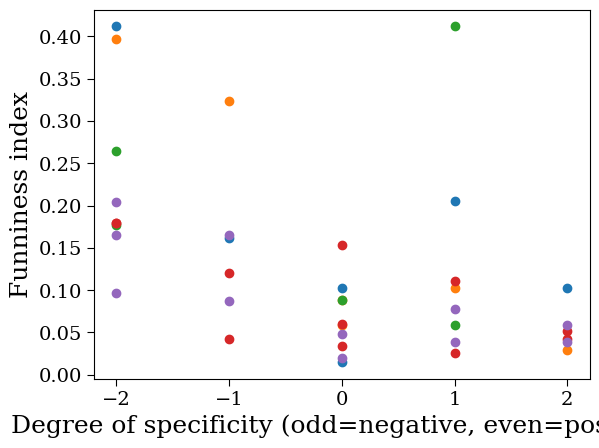

In [26]:
plt.figure()
plt.scatter(ps_30_35, fi_num_30_35)
plt.scatter(ps_45_50, fi_num_45_50)
plt.scatter(ps_63_67, fi_num_63_67)
plt.scatter(ps_0_10, fi_num_0_10)
plt.scatter(ps_77_87, fi_num_77_87)
plt.xlabel("Degree of specificity (odd=negative, even=positive)")
plt.ylabel("Funniness index")
plt.show();

In [27]:
arr_num_list = [funny_num_30_35, funny_num_45_50, funny_num_63_67, funny_num_0_10, funny_num_77_87]
tot_counts = np.array([0]*10)
tot_counts_no0 = np.array([0]*10)
for arr in arr_num_list: # for each number range
    nums, counts = np.unique(arr, return_counts=True)
    on_010 = nums[0]==0 # for excluding 0
    xmod = nums%10
    for i in range(0,10): # for each number in 10s place
        modlist = np.where(xmod==i)[0] # get indices for numbers with i in 10s place
        for ji, j in enumerate(modlist): # for each number with i in 10s place
            tot_counts[i] += counts[j]
            if (on_010 and i==0 and ji==0): # stupid way to not count the 0 but it works lol
                continue
            tot_counts_no0[i] += counts[j]
            
arr_res_list = [funny_res_30_35, funny_res_45_50, funny_res_63_67, funny_res_0_10, funny_res_77_87]
tot_res_counts = np.array([0]*10)
tot_res_counts_no0 = np.array([0]*10)
for arr in arr_res_list: # for each number range
    nums, counts = np.unique(arr, return_counts=True)
    on_010 = nums[0]==0 # for excluding 0
    xmod = nums%10
    for i in range(0,10): # for each number in 10s place
        modlist = np.where(xmod==i)[0] # get indices for numbers with i in 10s place
        for ji, j in enumerate(modlist): # for each number with i in 10s place
            tot_res_counts[i] += counts[j]
            if (on_010 and i==0 and ji==0): # stupid way to not count the 0 but it works lol
                continue
            tot_res_counts_no0[i] += counts[j]          

In [28]:
arr_num_list_nm = [funny_num_30_35_nm, funny_num_45_50_nm, funny_num_63_67_nm, funny_num_0_10_nm, funny_num_77_87_nm]
tot_counts_nm = np.array([0]*10)
tot_counts_no0_nm = np.array([0]*10)
for arr in arr_num_list_nm: # for each number range
    nums, counts = np.unique(arr, return_counts=True)
    on_010 = nums[0]==0 # for excluding 0
    xmod = nums%10
    for i in range(0,10): # for each number in 10s place
        modlist = np.where(xmod==i)[0] # get indices for numbers with i in 10s place
        for ji, j in enumerate(modlist): # for each number with i in 10s place
            tot_counts_nm[i] += counts[j]
            if (on_010 and i==0 and ji==0): # stupid way to not count the 0 but it works lol
                continue
            tot_counts_no0_nm[i] += counts[j]
            
arr_res_list_nm = [funny_res_30_35_nm, funny_res_45_50_nm, funny_res_63_67_nm, funny_res_0_10_nm, funny_res_77_87_nm]
tot_res_counts_nm = np.array([0]*10)
tot_res_counts_no0_nm = np.array([0]*10)
for arr in arr_res_list_nm: # for each number range
    nums, counts = np.unique(arr, return_counts=True)
    on_010 = nums[0]==0 # for excluding 0
    xmod = nums%10
    for i in range(0,10): # for each number in 10s place
        modlist = np.where(xmod==i)[0] # get indices for numbers with i in 10s place
        for ji, j in enumerate(modlist): # for each number with i in 10s place
            tot_res_counts_nm[i] += counts[j]
            if (on_010 and i==0 and ji==0): # stupid way to not count the 0 but it works lol
                continue
            tot_res_counts_no0_nm[i] += counts[j]  

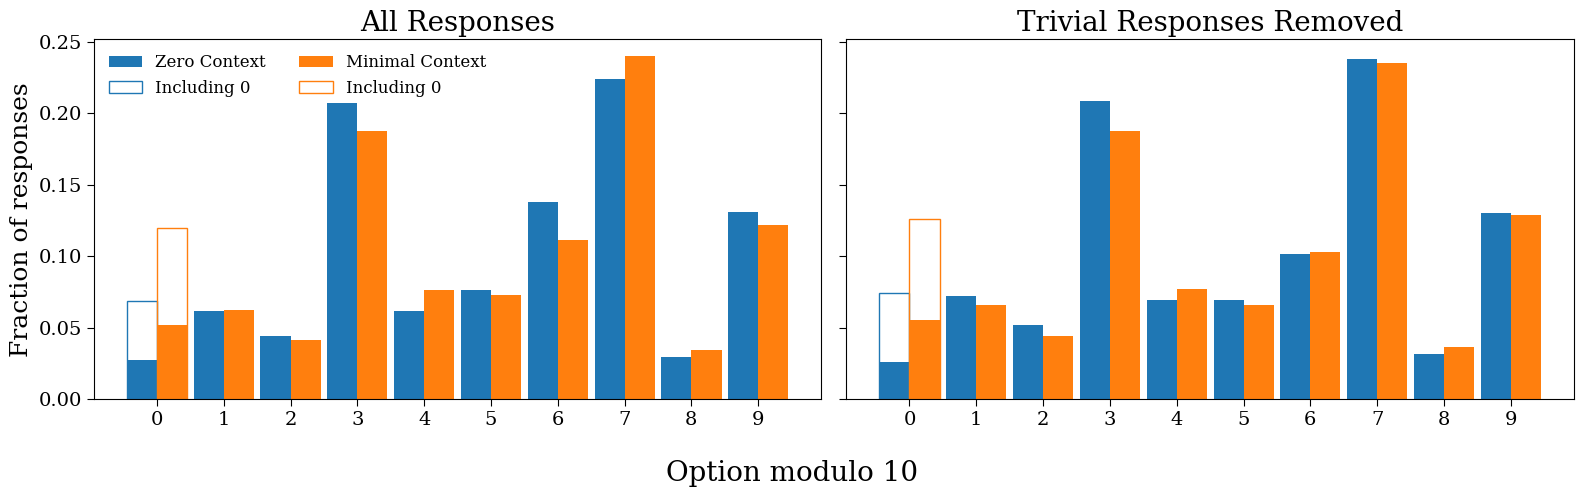

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(16,5), sharey=True)
x_mod10 = np.array([0,1,2,3,4,5,6,7,8,9])
w = 0.45
offset = 0.225
col0 = 'C0'
col1 = 'C1'

ax[0].bar(x=x_mod10-offset, height=tot_counts_no0/np.sum(tot_counts_no0), width=w, color=col0, 
        label="Zero Context")
ax[0].bar(x=x_mod10[0]-offset, height=tot_counts[0]/np.sum(tot_counts), width=w, edgecolor=col0, color='None', 
        label="Including 0")
ax[0].bar(x=x_mod10+offset, height=tot_res_counts_no0/np.sum(tot_res_counts_no0), width=w, color=col1, 
         label="Minimal Context")
ax[0].bar(x=x_mod10[0]+offset, height=tot_res_counts[0]/np.sum(tot_res_counts), width=w, edgecolor=col1, 
        color='None', label="Including 0")
ax[0].legend(ncol=2, loc='upper left', fontsize=12, facecolor='none')
ax[0].set_ylabel("Fraction of responses")
ax[0].set_xticks(x_mod10)
ax[0].set_title("All Responses")

ax[1].bar(x=x_mod10-offset, height=tot_counts_no0_nm/np.sum(tot_counts_no0_nm), width=w, color=col0, 
        label="Zero context")
ax[1].bar(x=x_mod10[0]-offset, height=tot_counts_nm[0]/np.sum(tot_counts_nm), width=w, edgecolor=col0, color='None', 
        label="Including 0")
ax[1].bar(x=x_mod10+offset, height=tot_res_counts_no0_nm/np.sum(tot_res_counts_no0_nm), width=w, color=col1, 
         label="Minimal context")
ax[1].bar(x=x_mod10[0]+offset, height=tot_res_counts_nm[0]/np.sum(tot_res_counts_nm), width=w, edgecolor=col1, 
        color='None', label="Including 0")
ax[1].set_xticks(x_mod10)
ax[1].set_title("Trivial Responses Removed")
fig.supxlabel("Option modulo 10", fontsize=20)
fig.tight_layout()
# plt.savefig('Plots/numMod10.pdf')
plt.show();

In [30]:
print("Null hypothesis: no difference in funniness between even and odd")
even_numTot = 0
odd_numTot = 0
even_numN0 = 0
odd_numN0 = 0
even_resTot = 0
odd_resTot = 0
even_resN0 = 0
odd_resN0 = 0
for i in range(0,10):
    if (i%2==0):
        even_numTot += tot_counts[i]
        even_numN0 += tot_counts_no0[i]
        even_resTot += tot_res_counts[i]
        even_resN0 += tot_res_counts_no0[i]
    else:
        odd_numTot += tot_counts[i]
        odd_numN0 += tot_counts_no0[i]
        odd_resTot += tot_res_counts[i]
        odd_resN0 += tot_res_counts_no0[i] 
# for numTot, there are 6 evens (0,2,4,6,8,10) and 5 odds (1,3,5,7,9)
sum_numTot_evenOdd = even_numTot+odd_numTot
exp_numTot_even = 6*sum_numTot_evenOdd/11
exp_numTot_odd  = sum_numTot_evenOdd - exp_numTot_even
exp_numTot_evenOdd  = np.array([exp_numTot_even, exp_numTot_odd])
sum_numN0_evenOdd = even_numN0+odd_numN0
chi2_numTot_evenOdd = chisquare(np.array([even_numTot, odd_numTot]), f_exp=exp_numTot_evenOdd)
chi2_numN0_evenOdd  = chisquare(np.array([even_numN0, odd_numN0]), f_exp=np.array([sum_numN0_evenOdd/2, sum_numN0_evenOdd/2]))

sum_resTot_evenOdd = even_resTot+odd_resTot
exp_resTot_even    = 6*sum_resTot_evenOdd/11
exp_resTot_odd     = sum_resTot_evenOdd - exp_resTot_even
exp_resTot_evenOdd = np.array([exp_resTot_even, exp_resTot_odd])
chi2_resTot_evenOdd = chisquare(np.array([even_resTot, odd_resTot]), f_exp=exp_resTot_evenOdd)
chi2_resN0_evenOdd  = chisquare(np.array([even_resN0, odd_resN0]))

print(chi2_numTot_evenOdd)
print(chi2_numN0_evenOdd)
print()
print(chi2_resTot_evenOdd)
print(chi2_resN0_evenOdd)

Null hypothesis: no difference in funniness between even and odd
Power_divergenceResult(statistic=79.24654088050315, pvalue=5.482326525837219e-19)
Power_divergenceResult(statistic=64.64039408866995, pvalue=8.989347128549242e-16)

Power_divergenceResult(statistic=40.93430107526882, pvalue=1.5743357871725147e-10)
Power_divergenceResult(statistic=39.013888888888886, pvalue=4.208011467223086e-10)


In [31]:
print("Null hypothesis: no difference in funniness between even and odd (non-mimetic)")
even_numTot_nm = 0
odd_numTot_nm = 0
even_numN0_nm = 0
odd_numN0_nm = 0
even_resTot_nm = 0
odd_resTot_nm = 0
even_resN0_nm = 0
odd_resN0_nm = 0
for i in range(0,10):
    if (i%2==0):
        even_numTot_nm += tot_counts_nm[i]
        even_numN0_nm += tot_counts_no0_nm[i]
        even_resTot_nm += tot_res_counts_nm[i]
        even_resN0_nm += tot_res_counts_no0_nm[i]
    else:
        odd_numTot_nm += tot_counts_nm[i]
        odd_numN0_nm += tot_counts_no0_nm[i]
        odd_resTot_nm += tot_res_counts_nm[i]
        odd_resN0_nm += tot_res_counts_no0_nm[i] 
# for numTot, there are 6 evens (0,2,4,6,8,10) and 5 odds (1,3,5,7,9)
sum_numTot_evenOdd_nm = even_numTot_nm+odd_numTot_nm
exp_numTot_even_nm = 6*sum_numTot_evenOdd_nm/11
exp_numTot_odd_nm  = sum_numTot_evenOdd_nm - exp_numTot_even_nm
exp_numTot_evenOdd_nm  = np.array([exp_numTot_even_nm, exp_numTot_odd_nm])
sum_numN0_evenOdd_nm = even_numN0_nm+odd_numN0_nm
chi2_numTot_evenOdd_nm = chisquare(np.array([even_numTot_nm, odd_numTot_nm]), f_exp=exp_numTot_evenOdd_nm)
chi2_numN0_evenOdd_nm  = chisquare(np.array([even_numN0_nm, odd_numN0_nm]), f_exp=np.array([sum_numN0_evenOdd_nm/2, sum_numN0_evenOdd_nm/2]))

sum_resTot_evenOdd_nm = even_resTot_nm+odd_resTot_nm
exp_resTot_even_nm    = 6*sum_resTot_evenOdd_nm/11
exp_resTot_odd_nm    = sum_resTot_evenOdd_nm - exp_resTot_even_nm
exp_resTot_evenOdd_nm = np.array([exp_resTot_even_nm, exp_resTot_odd_nm])
chi2_resTot_evenOdd_nm = chisquare(np.array([even_resTot_nm, odd_resTot_nm]), f_exp=exp_resTot_evenOdd_nm)
chi2_resN0_evenOdd_nm  = chisquare(np.array([even_resN0_nm, odd_resN0_nm]))

print(chi2_numTot_evenOdd_nm)
print(chi2_numN0_evenOdd_nm)
print()
print(chi2_resTot_evenOdd_nm)
print(chi2_resN0_evenOdd_nm)

Null hypothesis: no difference in funniness between even and odd (non-mimetic)
Power_divergenceResult(statistic=76.54444444444445, pvalue=2.1531233523573097e-18)
Power_divergenceResult(statistic=66.08985507246376, pvalue=4.30827573758812e-16)

Power_divergenceResult(statistic=37.616326530612255, pvalue=8.612061960987769e-10)
Power_divergenceResult(statistic=36.76470588235294, pvalue=1.3328142940540715e-09)


In [32]:
print("Null hypothesis: oddly and evenly specific numbers are equally funny")
deg_of_spec = np.array([0,1,2,2,1,0,1,2,2,1])

ds_num_1even = 0
ds_num_1odd = 0
ds_num_2even = 0
ds_num_2odd = 0

ds_res_1even = 0
ds_res_1odd = 0
ds_res_2even = 0
ds_res_2odd = 0

for ids, ds in enumerate(deg_of_spec):
    if ds==1:
        if ids%2==0: # even
            ds_num_1even += tot_counts[ids]
            ds_res_1even += tot_res_counts[ids]
        else: # odd
            ds_num_1odd += tot_counts[ids]
            ds_res_1odd += tot_res_counts[ids]
    elif ds==2:
        if ids%2==0:
            ds_num_2even += tot_counts[ids]
            ds_res_2even += tot_res_counts[ids]
        else:
            ds_num_2odd += tot_counts[ids]
            ds_res_2odd += tot_res_counts[ids]
chi2_num_ds1evenOdd = chisquare(np.array([ds_num_1even, ds_num_1odd]))
chi2_num_ds2evenOdd = chisquare(np.array([ds_num_2even, ds_num_2odd]))
chi2_res_ds1evenOdd = chisquare(np.array([ds_res_1even, ds_res_1odd]))
chi2_res_ds2evenOdd = chisquare(np.array([ds_res_2even, ds_res_2odd]))
print(chi2_num_ds1evenOdd)
print(chi2_num_ds2evenOdd)
print()
print(chi2_res_ds1evenOdd)
print(chi2_res_ds2evenOdd)

Null hypothesis: oddly and evenly specific numbers are equally funny
Power_divergenceResult(statistic=0.05660377358490566, pvalue=0.8119466522247988)
Power_divergenceResult(statistic=102.5609756097561, pvalue=4.182925973593143e-24)

Power_divergenceResult(statistic=0.009345794392523364, pvalue=0.922985566918368)
Power_divergenceResult(statistic=70.35172413793103, pvalue=4.9619465268341074e-17)


In [33]:
print(ds_num_1even + ds_num_1odd)
print(ds_res_1even + ds_res_1odd)

159
107


In [34]:
print("Null hypothesis: oddly and evenly specific numbers are equally funny (non-mimetic)")
deg_of_spec = np.array([0,1,2,2,1,0,1,2,2,1])

ds_num_1even_nm = 0
ds_num_1odd_nm = 0
ds_num_2even_nm = 0
ds_num_2odd_nm = 0

ds_res_1even_nm = 0
ds_res_1odd_nm = 0
ds_res_2even_nm = 0
ds_res_2odd_nm = 0

for ids, ds in enumerate(deg_of_spec):
    if ds==1:
        if ids%2==0: # even
            ds_num_1even_nm += tot_counts_nm[ids]
            ds_res_1even_nm += tot_res_counts_nm[ids]
        else: # odd
            ds_num_1odd_nm += tot_counts_nm[ids]
            ds_res_1odd_nm += tot_res_counts_nm[ids]
    elif ds==2:
        if ids%2==0:
            ds_num_2even_nm += tot_counts_nm[ids]
            ds_res_2even_nm += tot_res_counts_nm[ids]
        else:
            ds_num_2odd_nm += tot_counts_nm[ids]
            ds_res_2odd_nm += tot_res_counts_nm[ids]
chi2_num_ds1evenOdd_nm = chisquare(np.array([ds_num_1even_nm, ds_num_1odd_nm]))
chi2_num_ds2evenOdd_nm = chisquare(np.array([ds_num_2even_nm, ds_num_2odd_nm]))
chi2_res_ds1evenOdd_nm = chisquare(np.array([ds_res_1even_nm, ds_res_1odd_nm]))
chi2_res_ds2evenOdd_nm = chisquare(np.array([ds_res_2even_nm, ds_res_2odd_nm]))
print(chi2_num_ds1evenOdd_nm)
print(chi2_num_ds2evenOdd_nm)
print()
print(chi2_res_ds1evenOdd_nm)
print(chi2_res_ds2evenOdd_nm)

Null hypothesis: oddly and evenly specific numbers are equally funny (non-mimetic)
Power_divergenceResult(statistic=0.937984496124031, pvalue=0.33279671725145926)
Power_divergenceResult(statistic=85.38251366120218, pvalue=2.4588545963805702e-20)

Power_divergenceResult(statistic=0.1568627450980392, pvalue=0.6920614909359382)
Power_divergenceResult(statistic=63.13138686131387, pvalue=1.9336815176590143e-15)


In [35]:
print(ds_num_1even_nm + ds_num_1odd_nm)
print(ds_res_1even_nm + ds_res_1odd_nm)

129
102


In [36]:
print("Null hypothesis: funniness independent of degree of specificity")
deg_of_spec = np.array([0,1,2,2,1,0,1,2,2,1])
ds_numTot_0 = 0
ds_numTot_1 = 0
ds_numTot_2 = 0

ds_numN0_0 = 0
ds_numN0_1 = 0
ds_numN0_2 = 0

ds_resTot_0 = 0
ds_resTot_1 = 0
ds_resTot_2 = 0

ds_resN0_0 = 0
ds_resN0_1 = 0
ds_resN0_2 = 0

for ids, ds in enumerate(deg_of_spec):
    if ds==0:
        ds_numTot_0 += tot_counts[ids]
        ds_numN0_0  += tot_counts_no0[ids]
        ds_resTot_0 += tot_res_counts[ids]
        ds_resN0_0  += tot_res_counts_no0[ids]
    elif ds==1:
        ds_numTot_1 += tot_counts[ids]
        ds_numN0_1  += tot_counts_no0[ids]
        ds_resTot_1 += tot_res_counts[ids]
        ds_resN0_1  += tot_res_counts_no0[ids]
    elif ds==2:
        ds_numTot_2 += tot_counts[ids]
        ds_numN0_2  += tot_counts_no0[ids]
        ds_resTot_2 += tot_res_counts[ids]
        ds_resN0_2  += tot_res_counts_no0[ids]
        
# ds=0: 2, ds=1: 4, ds=2: 4
ds_numTot_sum = np.sum(tot_counts)
ds_numN0_sum  = np.sum(tot_counts_no0)
ds_resTot_sum = np.sum(tot_res_counts)
ds_resN0_sum  = np.sum(tot_res_counts_no0)
def get_ds_exp(ds_sum):
    a = ds_sum/5
    return np.array([a, 2*a, 2*a])
chi2_numTot_ds = chisquare(np.array([ds_numTot_0, ds_numTot_1, ds_numTot_2]), f_exp=get_ds_exp(ds_numTot_sum))
chi2_numN0_ds = chisquare(np.array([ds_numN0_0, ds_numN0_1, ds_numN0_2]), f_exp=get_ds_exp(ds_numN0_sum))
chi2_resTot_ds = chisquare(np.array([ds_resTot_0, ds_resTot_1, ds_resTot_2]), f_exp=get_ds_exp(ds_resTot_sum))
chi2_resN0_ds = chisquare(np.array([ds_resN0_0, ds_resN0_1, ds_resN0_2]), f_exp=get_ds_exp(ds_resN0_sum))
print(chi2_numTot_ds)
print(chi2_numN0_ds)
print()
print(chi2_resTot_ds)
print(chi2_resN0_ds)

Null hypothesis: funniness independent of degree of specificity
Power_divergenceResult(statistic=15.304245283018869, pvalue=0.0004750347296691638)
Power_divergenceResult(statistic=30.169950738916256, pvalue=2.8098195986053643e-07)

Power_divergenceResult(statistic=6.145161290322581, pvalue=0.046301512772049934)
Power_divergenceResult(statistic=16.39236111111111, pvalue=0.00027570459992165466)


In [37]:
print(tot_res_counts.sum())
np.array([ds_resN0_0, ds_resN0_1, ds_resN0_2]).sum()

310


288

In [38]:
print("Null hypothesis: funniness independent of degree of specificity (non-mimetic)")
deg_of_spec = np.array([0,1,2,2,1,0,1,2,2,1])
ds_numTot_0_nm = 0
ds_numTot_1_nm = 0
ds_numTot_2_nm = 0

ds_numN0_0_nm = 0
ds_numN0_1_nm = 0
ds_numN0_2_nm = 0

ds_resTot_0_nm = 0
ds_resTot_1_nm = 0
ds_resTot_2_nm = 0

ds_resN0_0_nm = 0
ds_resN0_1_nm = 0
ds_resN0_2_nm = 0

for ids, ds in enumerate(deg_of_spec):
    if ds==0:
        ds_numTot_0_nm += tot_counts_nm[ids]
        ds_numN0_0_nm  += tot_counts_no0_nm[ids]
        ds_resTot_0_nm += tot_res_counts_nm[ids]
        ds_resN0_0_nm  += tot_res_counts_no0_nm[ids]
    elif ds==1:
        ds_numTot_1_nm += tot_counts_nm[ids]
        ds_numN0_1_nm  += tot_counts_no0_nm[ids]
        ds_resTot_1_nm += tot_res_counts_nm[ids]
        ds_resN0_1_nm += tot_res_counts_no0_nm[ids]
    elif ds==2:
        ds_numTot_2_nm += tot_counts_nm[ids]
        ds_numN0_2_nm += tot_counts_no0_nm[ids]
        ds_resTot_2_nm += tot_res_counts_nm[ids]
        ds_resN0_2_nm  += tot_res_counts_no0_nm[ids]
        
# ds=0: 2, ds=1: 4, ds=2: 4
ds_numTot_sum_nm = np.sum(tot_counts_nm)
ds_numN0_sum_nm  = np.sum(tot_counts_no0_nm)
ds_resTot_sum_nm = np.sum(tot_res_counts_nm)
ds_resN0_sum_nm  = np.sum(tot_res_counts_no0_nm)
def get_ds_exp(ds_sum):
    a = ds_sum/5
    return np.array([a, 2*a, 2*a])
chi2_numTot_ds_nm = chisquare(np.array([ds_numTot_0_nm, ds_numTot_1_nm, ds_numTot_2_nm]), f_exp=get_ds_exp(ds_numTot_sum_nm))
chi2_numN0_ds_nm = chisquare(np.array([ds_numN0_0_nm, ds_numN0_1_nm, ds_numN0_2_nm]), f_exp=get_ds_exp(ds_numN0_sum_nm))
chi2_resTot_ds_nm = chisquare(np.array([ds_resTot_0_nm, ds_resTot_1_nm, ds_resTot_2_nm]), f_exp=get_ds_exp(ds_resTot_sum_nm))
chi2_resN0_ds_nm = chisquare(np.array([ds_resN0_0_nm, ds_resN0_1_nm, ds_resN0_2_nm]), f_exp=get_ds_exp(ds_resN0_sum_nm))
print(chi2_numTot_ds_nm)
print(chi2_numN0_ds_nm)
print()
print(chi2_resTot_ds_nm)
print(chi2_resN0_ds_nm)

Null hypothesis: funniness independent of degree of specificity (non-mimetic)
Power_divergenceResult(statistic=18.074380165289256, pvalue=0.0001189044792403336)
Power_divergenceResult(statistic=34.04347826086956, pvalue=4.0509102684960864e-08)

Power_divergenceResult(statistic=5.51530612244898, pvalue=0.0634404847107978)
Power_divergenceResult(statistic=16.152573529411764, pvalue=0.0003108230543719464)


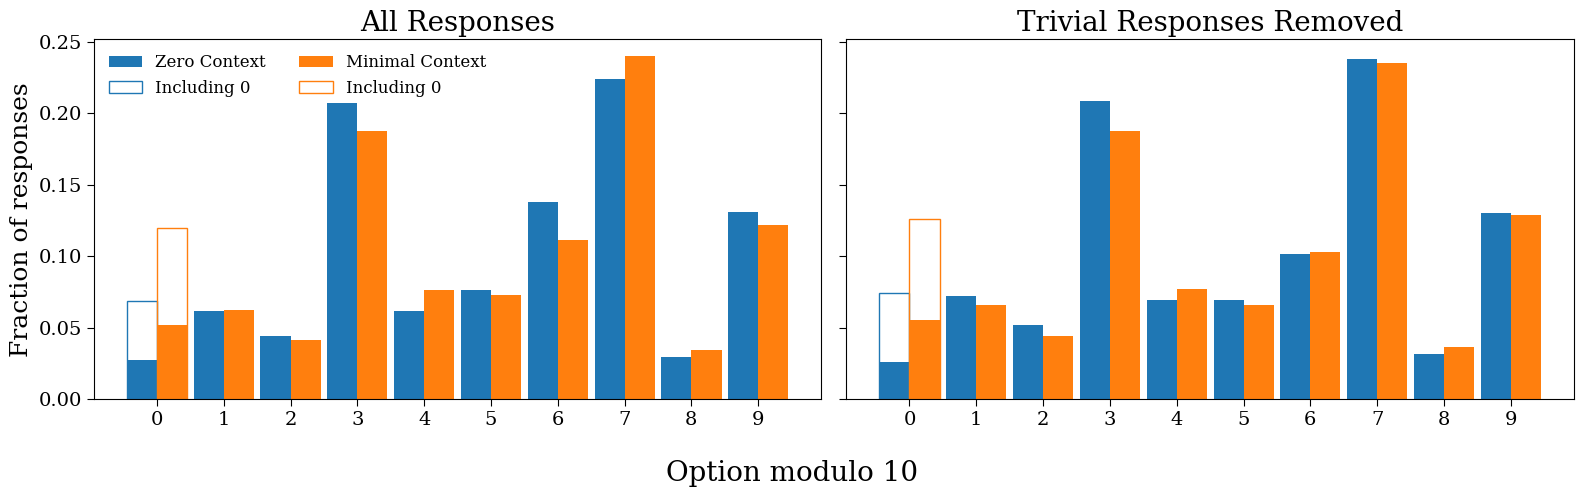

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(16,5), sharey=True)
x_mod10 = np.array([0,1,2,3,4,5,6,7,8,9])
w = 0.45
offset = 0.225
col0 = 'C0'
col1 = 'C1'

ax[0].bar(x=x_mod10-offset, height=tot_counts_no0/np.sum(tot_counts_no0), width=w, color=col0, 
        label="Zero Context")
ax[0].bar(x=x_mod10[0]-offset, height=tot_counts[0]/np.sum(tot_counts), width=w, edgecolor=col0, color='None', 
        label="Including 0")
ax[0].bar(x=x_mod10+offset, height=tot_res_counts_no0/np.sum(tot_res_counts_no0), width=w, color=col1, 
         label="Minimal Context")
ax[0].bar(x=x_mod10[0]+offset, height=tot_res_counts[0]/np.sum(tot_res_counts), width=w, edgecolor=col1, 
        color='None', label="Including 0")
ax[0].legend(ncol=2, loc='upper left', fontsize=12, facecolor='none')
ax[0].set_ylabel("Fraction of responses")
ax[0].set_xticks(x_mod10)
ax[0].set_title("All Responses")

ax[1].bar(x=x_mod10-offset, height=tot_counts_no0_nm/np.sum(tot_counts_no0_nm), width=w, color=col0, 
        label="Zero context")
ax[1].bar(x=x_mod10[0]-offset, height=tot_counts_nm[0]/np.sum(tot_counts_nm), width=w, edgecolor=col0, color='None', 
        label="Including 0")
ax[1].bar(x=x_mod10+offset, height=tot_res_counts_no0_nm/np.sum(tot_res_counts_no0_nm), width=w, color=col1, 
         label="Minimal context")
ax[1].bar(x=x_mod10[0]+offset, height=tot_res_counts_nm[0]/np.sum(tot_res_counts_nm), width=w, edgecolor=col1, 
        color='None', label="Including 0")
ax[1].set_xticks(x_mod10)
ax[1].set_title("Trivial Responses Removed")
fig.supxlabel("Option modulo 10", fontsize=20)
fig.tight_layout()
# plt.savefig('Plots/numMod10.pdf')
plt.show();

In [40]:
tot_counts.sum()

424

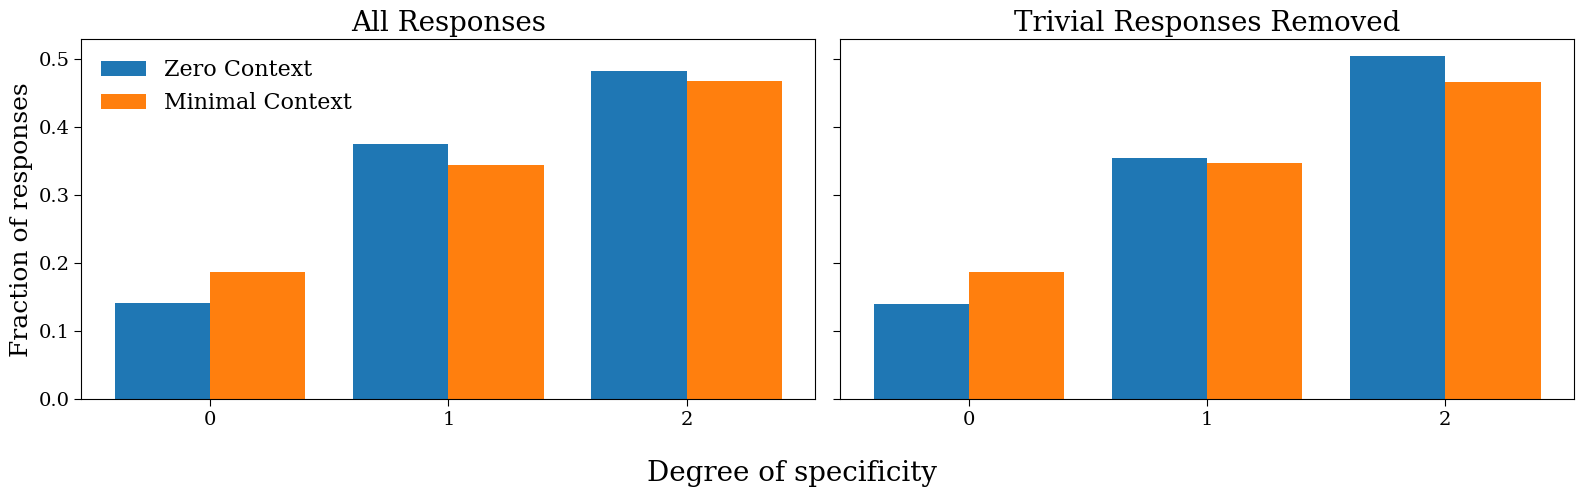

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(16,5), sharey=True)
x_dos = np.array([0, 1, 2])
w = .4
offset = .2
ax[0].bar(x=x_dos-offset, height=np.array([ds_numTot_0, ds_numTot_1, ds_numTot_2])/tot_counts.sum(), 
          width=w, label="Zero Context")
ax[0].bar(x=x_dos+offset, height=np.array([ds_resTot_0, ds_resTot_1, ds_resTot_2])/tot_res_counts.sum(),
          width=w, label="Minimal Context")
ax[0].legend()
ax[0].set_ylabel("Fraction of responses")
ax[0].set_title("All Responses")

ax[1].bar(x=x_dos-offset, height=np.array([ds_numTot_0_nm, ds_numTot_1_nm, ds_numTot_2_nm])/tot_counts_nm.sum(), 
          width=w, label="Zero Context")
ax[1].bar(x=x_dos+offset, height=np.array([ds_resTot_0_nm, ds_resTot_1_nm, ds_resTot_2_nm])/tot_res_counts_nm.sum(),
          width=w, label="Minimal Context")
ax[1].set_title("Trivial Responses Removed")
for i in range(0,2):
    ax[i].set_xticks(x_dos)
fig.supxlabel("Degree of specificity", fontsize=20)
fig.tight_layout()
# plt.savefig('Plots/results_genDos.pdf')
plt.show();

6.0
6.0


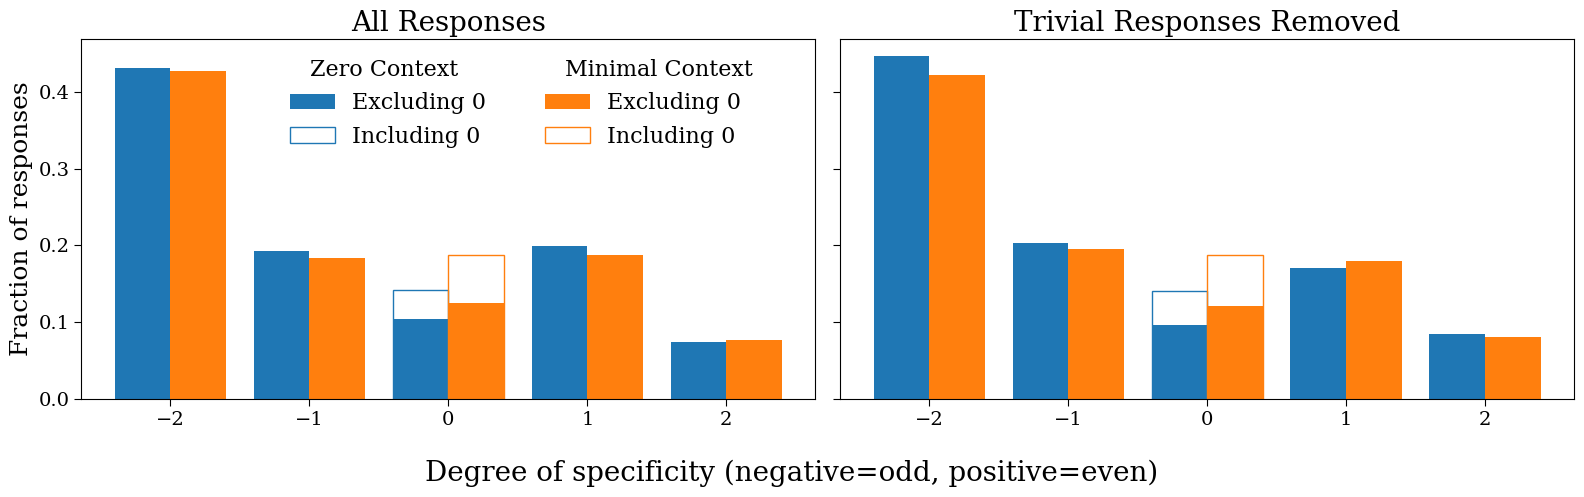

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(16,5), sharey=True)
x_dosOE = np.array([-2, -1, 0, 1, 2])
w = 0.4
offset = 0.2
tit1 = ax[0].scatter(x=[], y=[], edgecolor='none', facecolor='none', label="$\\bf{Zero}$ $\\bf{Context}$")
numTot = ax[0].bar(x=x_dosOE-offset, 
            height=np.array([ds_num_2odd, ds_num_1odd, ds_numN0_0, ds_num_1even, ds_num_2even])/np.sum(tot_counts_no0),
            width=w, label="Excluding 0")

num0 = ax[0].bar(x=np.array([0])-offset, 
            height=np.array([ds_numTot_0])/np.sum(tot_counts), facecolor='none', edgecolor='C0',
            width=w, label="Including 0")

tit2 = ax[0].scatter(x=[], y=[], edgecolor='none', facecolor='none', label="$\\bf{Minimum}$ $\\bf{Context}$")
resTot = ax[0].bar(x=x_dosOE+offset, 
            height=np.array([ds_res_2odd, ds_res_1odd, ds_resN0_0, ds_res_1even, ds_res_2even])/np.sum(tot_res_counts_no0), 
            width=w, color='C1', label="Excluding 0")
res0 = ax[0].bar(x=np.array([0])+offset, 
            height=np.array([ds_resTot_0])/np.sum(tot_res_counts), facecolor='none', edgecolor='C1',
            width=w, label="Including 0")
ax[0].set_ylabel("Fraction of responses", fontsize=18)
ax[0].set_xticks(x_dosOE)


numTot_nm = ax[1].bar(x=x_dosOE-offset, 
            height=np.array([ds_num_2odd_nm, ds_num_1odd_nm, ds_numN0_0_nm, ds_num_1even_nm, ds_num_2even_nm])/np.sum(tot_counts_no0_nm),
            width=w, label="Excluding 0")

num0_nm = ax[1].bar(x=np.array([0])-offset, 
            height=np.array([ds_numTot_0_nm])/np.sum(tot_counts_nm), facecolor='none', edgecolor='C0',
            width=w, label="Including 0")

resTot_nm = ax[1].bar(x=x_dosOE+offset, 
            height=np.array([ds_res_2odd_nm, ds_res_1odd_nm, ds_resN0_0_nm, ds_res_1even_nm, ds_res_2even_nm])/np.sum(tot_res_counts_no0_nm), 
            width=w, color='C1', label="Excluding 0")
res0 = ax[1].bar(x=np.array([0])+offset, 
            height=np.array([ds_resTot_0_nm])/np.sum(tot_res_counts_nm), facecolor='none', edgecolor='C1',
            width=w, label="Including 0")
ax[1].set_xticks(x_dosOE)


handles = [tit1, numTot, num0, tit2, resTot, res0]
labels = ['Zero Context', 'Excluding 0', 'Including 0', 'Minimal Context', 'Excluding 0', 'Including 0']
leg = ax[0].legend(handles, labels, ncol=2, fontsize=16, loc='upper right');
for item, label in zip(leg.legend_handles, leg.texts):
    if label._text in ['Zero Context', 'Minimal Context']:
        width = item.get_window_extent(fig.canvas.get_renderer()).width
        print(width)
        label.set_ha('left')
        label.set_position((-7*width,0))
        
ax[0].set_title("All Responses")
ax[1].set_title("Trivial Responses Removed")
fig.supxlabel("Degree of specificity (negative=odd, positive=even)", fontsize=20);
fig.tight_layout()
# plt.savefig('Plots/degofspecResults.pdf')
plt.show();

6.0
6.0


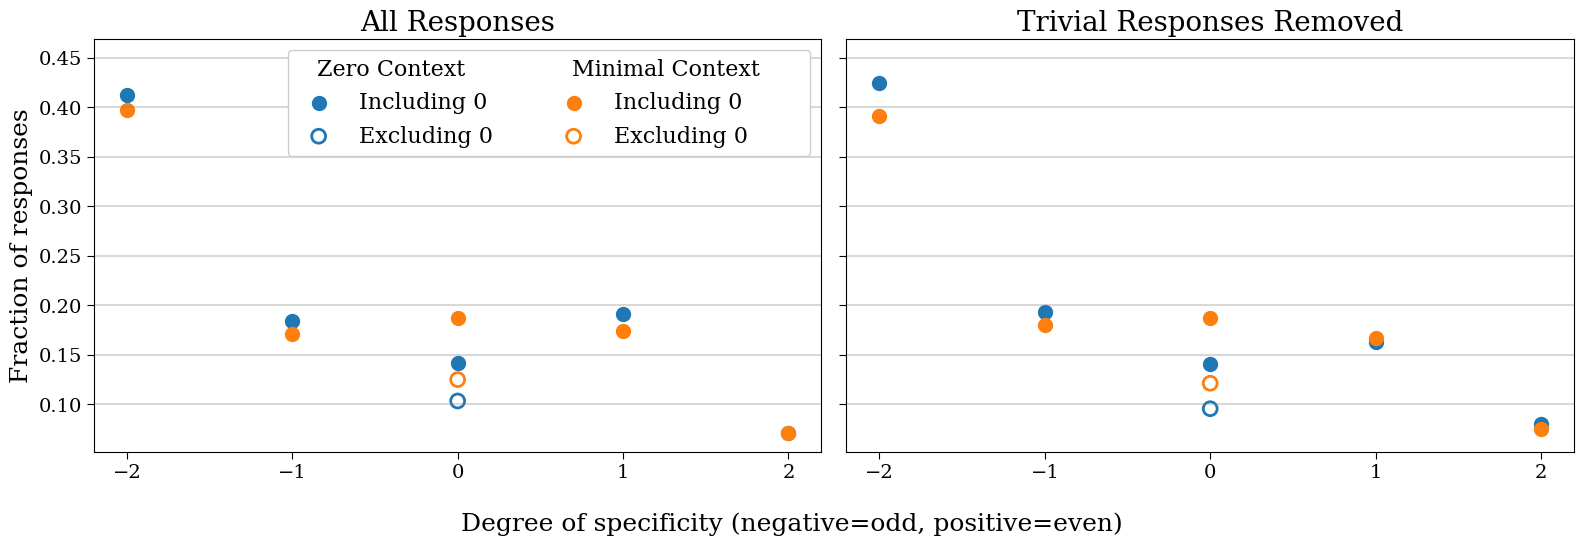

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(16,5.5), sharey=True)
s=100
tit1 = ax[0].scatter(x=[], y=[], edgecolor='none', facecolor='none', label="$\\bf{Zero}$ $\\bf{Context}$")
numTot = ax[0].scatter(x=np.array([-2,-1,0,1,2]), 
            y=np.array([ds_num_2odd, ds_num_1odd, ds_numTot_0, ds_num_1even, ds_num_2even])/np.sum(tot_counts),
            s=s, label="Including 0")
num0 = ax[0].scatter(x=np.array([0]), 
            y=np.array([ds_numN0_0])/np.sum(tot_counts_no0), facecolor='none', edgecolor='C0',
            lw=2, s=s, label="Excluding 0")
tit2 = ax[0].scatter(x=[], y=[], edgecolor='none', facecolor='none', label="$\\bf{Minimum}$ $\\bf{Context}$")
resTot = ax[0].scatter(x=np.array([-2,-1,0,1,2]), 
            y=np.array([ds_res_2odd, ds_res_1odd, ds_resTot_0, ds_res_1even, ds_res_2even])/np.sum(tot_res_counts), 
            s=s, color='C1', label="Including 0")
res0 = ax[0].scatter(x=np.array([0]), 
            y=np.array([ds_resN0_0])/np.sum(tot_res_counts_no0), facecolor='none', edgecolor='C1',
            lw=2, s=s, label="Excluding 0")
ax[0].set_ylabel("Fraction of responses", fontsize=18)
ax[0].set_xticks([-2,-1,0,1,2])


numTot_nm = ax[1].scatter(x=np.array([-2,-1,0,1,2]), 
            y=np.array([ds_num_2odd_nm, ds_num_1odd_nm, ds_numTot_0_nm, ds_num_1even_nm, ds_num_2even_nm])/np.sum(tot_counts_nm),
            s=s, label="Including 0")
num0_nm = ax[1].scatter(x=np.array([0]), 
            y=np.array([ds_numN0_0_nm])/np.sum(tot_counts_no0_nm), facecolor='none', edgecolor='C0',
            lw=2, s=s, label="Excluding 0")
resTot_nm = ax[1].scatter(x=np.array([-2,-1,0,1,2]), 
            y=np.array([ds_res_2odd_nm, ds_res_1odd_nm, ds_resTot_0_nm, ds_res_1even_nm, ds_res_2even_nm])/np.sum(tot_res_counts_nm), 
           s=s, color='C1', label="Including 0")
res0_nm = ax[1].scatter(x=np.array([0]), 
            y=np.array([ds_resN0_0_nm])/np.sum(tot_res_counts_no0_nm), facecolor='none', edgecolor='C1', s=s,
            lw=2, label="Excluding 0")
ax[1].set_xticks([-2,-1,0,1,2])


handles = [tit1, numTot, num0, tit2, resTot, res0]
labels = ['Zero Context', 'Including 0', 'Excluding 0', 'Minimal Context', 'Including 0', 'Excluding 0']
leg = ax[0].legend(handles, labels, ncol=2, fontsize=16, loc='upper right', frameon=True, framealpha=1);
for item, label in zip(leg.legend_handles, leg.texts):
    if label._text in ['Zero Context', 'Minimal Context']:
        width = item.get_window_extent(fig.canvas.get_renderer()).width
        print(width)
        label.set_ha('left')
        label.set_position((-7*width,0))
        
ax[0].set_title("All Responses")
ax[1].set_title("Trivial Responses Removed")
fig.supxlabel("Degree of specificity (negative=odd, positive=even)", fontsize=18);
aa = 0.3
gridcount = 0.1
while gridcount < 0.45:
    for i in range(0,2):
        ax[i].axhline(gridcount, color='gray', alpha=aa)
    gridcount += 0.05
fig.tight_layout(h_pad=0.05)
# plt.savefig('Plots/degofspecResults.pdf')
plt.show();

In [44]:
print("Null hypothesis: each number is equally funny")
chi2_num_3035 = chisquare(np.unique(funny_num_30_35, return_counts=True)[1])
print(chi2_num_3035)
chi2_res_3035 = chisquare(np.unique(funny_res_30_35, return_counts=True)[1])
print(chi2_res_3035)
print("------------------------------------------------------------")
chi2_num_4550 = chisquare(np.unique(funny_num_45_50, return_counts=True)[1])
print(chi2_num_4550)
chi2_res_4550 = chisquare(np.unique(funny_res_45_50, return_counts=True)[1])
print(chi2_res_4550)
print("------------------------------------------------------------")
chi2_num_6367 = chisquare(np.unique(funny_num_63_67, return_counts=True)[1])
print(chi2_num_6367)
chi2_res_6367 = chisquare(np.unique(funny_res_63_67, return_counts=True)[1])
print(chi2_res_6367)
print("------------------------------------------------------------")
chi2_num_010 = chisquare(np.unique(funny_num_0_10, return_counts=True)[1])
print(chi2_num_010)
chi2_res_010 = chisquare(np.unique(funny_res_0_10, return_counts=True)[1])
print(chi2_res_010)
print("------------------------------------------------------------")
chi2_num_7787 = chisquare(np.unique(funny_num_77_87, return_counts=True)[1])
print(chi2_num_7787)
chi2_res_7787 = chisquare(np.unique(funny_res_77_87, return_counts=True)[1])
print(chi2_res_7787)
print("------------------------------------------------------------")

Null hypothesis: each number is equally funny
Power_divergenceResult(statistic=37.882352941176464, pvalue=3.984231692212543e-07)
Power_divergenceResult(statistic=6.526315789473685, pvalue=0.25831778112992554)
------------------------------------------------------------
Power_divergenceResult(statistic=48.29411764705882, pvalue=3.093245962444424e-09)
Power_divergenceResult(statistic=32.05882352941176, pvalue=5.784014792701646e-06)
------------------------------------------------------------
Power_divergenceResult(statistic=27.88235294117647, pvalue=1.3176764460268565e-05)
Power_divergenceResult(statistic=9.647058823529411, pvalue=0.04681166262634929)
------------------------------------------------------------
Power_divergenceResult(statistic=45.74358974358974, pvalue=1.5960556747716159e-06)
Power_divergenceResult(statistic=56.88235294117647, pvalue=1.4024895991409211e-08)
------------------------------------------------------------
Power_divergenceResult(statistic=42.349514563106794, p

In [45]:
print("Null hypothesis: each number is equally funny (non-mimetic)")
chi2_num_3035_nm = chisquare(np.unique(funny_num_30_35_nm, return_counts=True)[1])
print(chi2_num_3035_nm)
chi2_res_3035_nm = chisquare(np.unique(funny_res_30_35_nm, return_counts=True)[1])
print(chi2_res_3035_nm)
print("------------------------------------------------------------")
chi2_num_4550_nm = chisquare(np.unique(funny_num_45_50_nm, return_counts=True)[1])
print(chi2_num_4550_nm)
chi2_res_4550_nm = chisquare(np.unique(funny_res_45_50_nm, return_counts=True)[1])
print(chi2_res_4550_nm)
print("------------------------------------------------------------")
chi2_num_6367_nm = chisquare(np.unique(funny_num_63_67_nm, return_counts=True)[1])
print(chi2_num_6367_nm)
chi2_res_6367_nm = chisquare(np.unique(funny_res_63_67_nm, return_counts=True)[1])
print(chi2_res_6367_nm)
print("------------------------------------------------------------")
chi2_num_010_nm = chisquare(np.unique(funny_num_0_10_nm, return_counts=True)[1])
print(chi2_num_010_nm)
chi2_res_010_nm = chisquare(np.unique(funny_res_0_10_nm, return_counts=True)[1])
print(chi2_res_010_nm)
print("------------------------------------------------------------")
chi2_num_7787_nm = chisquare(np.unique(funny_num_77_87_nm, return_counts=True)[1])
print(chi2_num_7787_nm)
chi2_res_7787_nm = chisquare(np.unique(funny_res_77_87_nm, return_counts=True)[1])
print(chi2_res_7787_nm)
print("------------------------------------------------------------")

Null hypothesis: each number is equally funny (non-mimetic)
Power_divergenceResult(statistic=15.25925925925926, pvalue=0.004192625869957286)
Power_divergenceResult(statistic=5.1764705882352935, pvalue=0.3947254933612905)
------------------------------------------------------------
Power_divergenceResult(statistic=46.04761904761905, pvalue=8.881608282288026e-09)
Power_divergenceResult(statistic=32.18181818181819, pvalue=5.468469540123376e-06)
------------------------------------------------------------
Power_divergenceResult(statistic=14.2, pvalue=0.006683349878453828)
Power_divergenceResult(statistic=9.333333333333334, pvalue=0.05328685445847284)
------------------------------------------------------------
Power_divergenceResult(statistic=49.6, pvalue=3.161336794526289e-07)
Power_divergenceResult(statistic=56.88235294117647, pvalue=1.4024895991409211e-08)
------------------------------------------------------------
Power_divergenceResult(statistic=39.66666666666668, pvalue=1.9394493011

In [46]:
print("Null hypothesis: no difference between Zero and Minimal Context")
print("N =", tot_counts.sum())
tot_res_counts_scaled = tot_res_counts/tot_res_counts.sum()*tot_counts.sum()
chi2_numVres = chisquare(f_obs=tot_res_counts_scaled, f_exp=tot_counts)
print(chi2_numVres)
print()
print("Null hypothesis: no difference between Zero and Minimal Context (non-mimetic)")
print("N =", tot_counts_nm.sum())
tot_res_counts_scaled_nm = tot_res_counts_nm/tot_res_counts_nm.sum()*tot_counts_nm.sum()
chi2_numVres_nm = chisquare(f_obs=tot_res_counts_scaled_nm, f_exp=tot_counts_nm)
print(chi2_numVres_nm)

Null hypothesis: no difference between Zero and Minimal Context
N = 424
Power_divergenceResult(statistic=22.199776495405892, pvalue=0.008266937492534088)

Null hypothesis: no difference between Zero and Minimal Context (non-mimetic)
N = 363
Power_divergenceResult(statistic=15.568413823358005, pvalue=0.07645980206149383)


In [47]:
print("Null hypothesis: no difference between numbers divisible by 10 (0, 10, 30, 50, 80)")
counts_num_0 = np.unique(funny_num_0_10, return_counts=True)[1][0]
counts_num_10 = np.unique(funny_num_0_10, return_counts=True)[1][10]
counts_num_30 = np.unique(funny_num_30_35, return_counts=True)[1][0]
counts_num_50 = np.unique(funny_num_45_50, return_counts=True)[1][5]
counts_num_80 = np.unique(funny_num_77_87, return_counts=True)[1][3]

counts_res_0 = np.unique(funny_res_0_10, return_counts=True)[1][0]
counts_res_10 = np.unique(funny_res_0_10, return_counts=True)[1][10]
counts_res_30 = np.unique(funny_res_30_35, return_counts=True)[1][0]
counts_res_50 = np.unique(funny_res_45_50, return_counts=True)[1][5]
counts_res_80 = np.unique(funny_res_77_87, return_counts=True)[1][3]

chi2_num_div10 = chisquare(np.array([counts_num_0, counts_num_10, counts_num_30, counts_num_50, counts_num_80]))
print(chi2_num_div10)
chi2_res_div10 = chisquare(np.array([counts_res_0, counts_res_10, counts_res_30, counts_res_50, counts_res_80]))
print(chi2_res_div10)

print()
print("Null hypothesis: no difference between (10, 30, 50, 80)")
chi2_num_div10no0 = chisquare(np.array([counts_num_10, counts_num_30, counts_num_50, counts_num_80]))
print(chi2_num_div10no0)
chi2_res_div10no0 = chisquare(np.array([counts_res_10, counts_res_30, counts_res_50, counts_res_80]))
print(chi2_res_div10no0)

Null hypothesis: no difference between numbers divisible by 10 (0, 10, 30, 50, 80)
Power_divergenceResult(statistic=33.241379310344826, pvalue=1.0659801057105982e-06)
Power_divergenceResult(statistic=40.97297297297296, pvalue=2.7226848195129247e-08)

Null hypothesis: no difference between (10, 30, 50, 80)
Power_divergenceResult(statistic=2.4545454545454546, pvalue=0.48356177129474476)
Power_divergenceResult(statistic=9.799999999999999, pvalue=0.02034499851520842)


In [48]:
arr = funny_num_30_35
print(np.unique(arr, return_counts=True)[0])
print(np.unique(arr, return_counts=True)[1])
print()
arr = funny_num_30_35_nm
print(np.unique(arr, return_counts=True)[0])
print(np.unique(arr, return_counts=True)[1])

[30 31 32 33 34 35]
[ 1 11  7 28 14  7]

[31 32 33 34 35]
[11  7 20 13  3]


In [49]:
print("Null hypothesis: no difference between numbers divisible by 10 (0, 10, 30, 50, 80) (non-mimetic)")
counts_num_0_nm = np.unique(funny_num_0_10_nm, return_counts=True)[1][0]
counts_num_10_nm = np.unique(funny_num_0_10_nm, return_counts=True)[1][10]
counts_num_30_nm = 0 # explicitly checked all these (see above), no nm counts for 30
counts_num_50_nm = np.unique(funny_num_45_50_nm, return_counts=True)[1][5]
counts_num_80_nm = np.unique(funny_num_77_87_nm, return_counts=True)[1][3]

counts_res_0_nm = np.unique(funny_res_0_10_nm, return_counts=True)[1][0]
counts_res_10_nm = np.unique(funny_res_0_10_nm, return_counts=True)[1][10]
counts_res_30_nm = np.unique(funny_res_30_35_nm, return_counts=True)[1][0]
counts_res_50_nm = np.unique(funny_res_45_50_nm, return_counts=True)[1][5]
counts_res_80_nm = np.unique(funny_res_77_87_nm, return_counts=True)[1][3]

chi2_num_div10_nm = chisquare(np.array([counts_num_0_nm, counts_num_10_nm, counts_num_30_nm, 
                                        counts_num_50_nm, counts_num_80_nm]))
print(chi2_num_div10_nm)
chi2_res_div10_nm = chisquare(np.array([counts_res_0_nm, counts_res_10_nm, counts_res_30_nm, 
                                     counts_res_50_nm, counts_res_80_nm]))
print(chi2_res_div10_nm)

print()
print("Null hypothesis: no difference between (10, 30, 50, 80) (non-mimetic)")
chi2_num_div10no0_nm = chisquare(np.array([counts_num_10_nm, counts_num_30_nm, counts_num_50_nm, 
                                           counts_num_80_nm]))
print(chi2_num_div10no0_nm)
chi2_res_div10no0_nm = chisquare(np.array([counts_res_10_nm, counts_res_30_nm, counts_res_50_nm, 
                                        counts_res_80_nm]))
print(chi2_res_div10no0_nm)

Null hypothesis: no difference between numbers divisible by 10 (0, 10, 30, 50, 80) (non-mimetic)
Power_divergenceResult(statistic=39.1111111111111, pvalue=6.607837444672417e-08)
Power_divergenceResult(statistic=40.97297297297296, pvalue=2.7226848195129247e-08)

Null hypothesis: no difference between (10, 30, 50, 80) (non-mimetic)
Power_divergenceResult(statistic=5.666666666666667, pvalue=0.12900306143743634)
Power_divergenceResult(statistic=9.799999999999999, pvalue=0.02034499851520842)


In [50]:
print("Null hypothesis: no difference between 0 and AVG(10, 30, 50, 80) (or median--report least significant)")
counts_num_avg10to80 = np.mean(np.array([counts_num_10, counts_num_30, counts_num_50, counts_num_80]))
counts_num_med10to80 = np.median(np.array([counts_num_10, counts_num_30, counts_num_50, counts_num_80]))

chi2_num_0toAvg = chisquare(np.array([counts_num_0, counts_num_avg10to80]))
chi2_num_0toMed = chisquare(np.array([counts_num_0, counts_num_med10to80]))
print("Avg:", chi2_num_0toAvg)
print("Med:", chi2_num_0toMed)
print()
counts_res_avg10to80 = np.mean(np.array([counts_res_10, counts_res_30, counts_res_50, counts_res_80]))
counts_res_med10to80 = np.median(np.array([counts_res_10, counts_res_30, counts_res_50, counts_res_80]))

chi2_res_0toAvg = chisquare(np.array([counts_res_0, counts_res_avg10to80]))
chi2_res_0toMed = chisquare(np.array([counts_res_0, counts_res_med10to80]))
print("Avg:", chi2_res_0toAvg)
print("Med:", chi2_res_0toMed)

Null hypothesis: no difference between 0 and AVG(10, 30, 50, 80) (or median--report least significant)
Avg: Power_divergenceResult(statistic=11.207831325301205, pvalue=0.0008145285409211221)
Med: Power_divergenceResult(statistic=10.714285714285714, pvalue=0.001063114917158605)

Avg: Power_divergenceResult(statistic=12.934466019417476, pvalue=0.000322587242727157)
Med: Power_divergenceResult(statistic=16.666666666666668, pvalue=4.455709060405612e-05)


In [51]:
print("Null hypothesis: no difference between 0 and AVG(10, 30, 50, 80) (or median--report least significant)")
print("(non-mimetic)")
counts_num_avg10to80_nm = np.mean(np.array([counts_num_10_nm, counts_num_30_nm, counts_num_50_nm, counts_num_80_nm]))
counts_num_med10to80_nm = np.median(np.array([counts_num_10_nm, counts_num_30_nm, counts_num_50_nm, counts_num_80_nm]))

chi2_num_0toAvg_nm = chisquare(np.array([counts_num_0_nm, counts_num_avg10to80_nm]))
chi2_num_0toMed_nm = chisquare(np.array([counts_num_0_nm, counts_num_med10to80_nm]))
print("Avg:", chi2_num_0toAvg_nm)
print("Med:", chi2_num_0toMed_nm)
print()
counts_res_avg10to80_nm = np.mean(np.array([counts_res_10_nm, counts_res_30_nm, counts_res_50_nm, counts_res_80_nm]))
counts_res_med10to80_nm = np.median(np.array([counts_res_10_nm, counts_res_30_nm, counts_res_50_nm, counts_res_80_nm]))

chi2_res_0toAvg_nm = chisquare(np.array([counts_res_0_nm, counts_res_avg10to80_nm]))
chi2_res_0toMed_nm = chisquare(np.array([counts_res_0_nm, counts_res_med10to80_nm]))
print("Avg:", chi2_res_0toAvg_nm)
print("Med:", chi2_res_0toMed_nm)

Null hypothesis: no difference between 0 and AVG(10, 30, 50, 80) (or median--report least significant)
(non-mimetic)
Avg: Power_divergenceResult(statistic=12.25, pvalue=0.0004652581580710503)
Med: Power_divergenceResult(statistic=11.71951219512195, pvalue=0.0006184816465136642)

Avg: Power_divergenceResult(statistic=12.934466019417476, pvalue=0.000322587242727157)
Med: Power_divergenceResult(statistic=16.666666666666668, pvalue=4.455709060405612e-05)


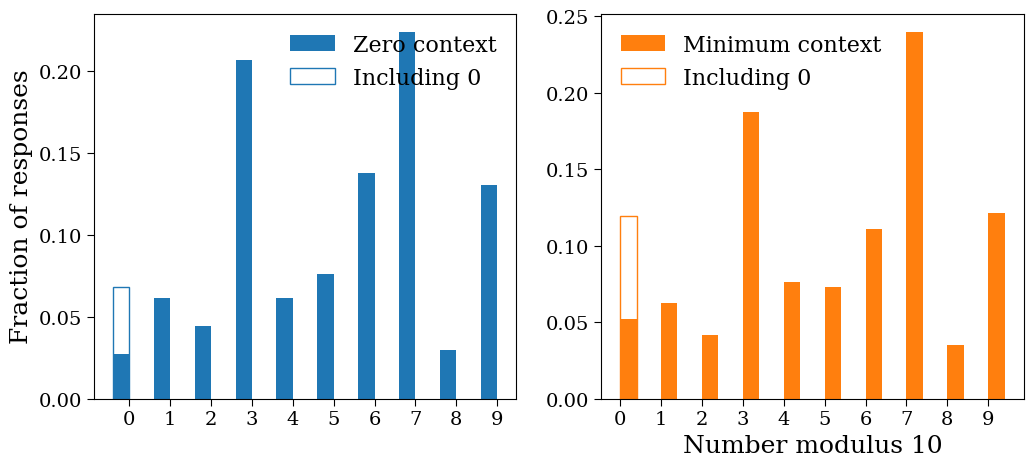

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
x_mod10 = np.array([0,1,2,3,4,5,6,7,8,9])
w = 0.4
offset = 0.2
ax[0].bar(x=x_mod10-offset, height=tot_counts_no0/np.sum(tot_counts_no0), width=w, label="Zero context")
ax[0].bar(x=x_mod10[0]-offset, height=tot_counts[0]/np.sum(tot_counts), width=w, edgecolor='C0', color='None', label="Including 0")
ax[0].legend()

ax[1].bar(x=x_mod10+offset, height=tot_res_counts_no0/np.sum(tot_res_counts_no0), width=w, color='C1',label="Minimum context")
ax[1].bar(x=x_mod10[0]+offset, height=tot_res_counts[0]/np.sum(tot_res_counts), width=w, edgecolor='C1', color='None', label="Including 0")
ax[1].legend()
ax[1].set_xlabel("Number modulus 10")
ax[0].set_ylabel("Fraction of responses")
ax[0].set_xticks(x_mod10)
ax[1].set_xticks(x_mod10)
plt.show();

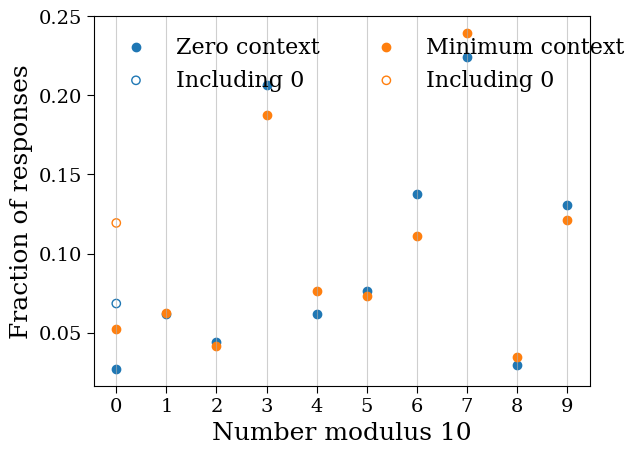

In [53]:
plt.figure()
plt.scatter(x=x_mod10, y=tot_counts_no0/np.sum(tot_counts_no0), label="Zero context")
plt.scatter(x=x_mod10[0], y=tot_counts[0]/np.sum(tot_counts), facecolor='none', edgecolor='C0', label="Including 0")
plt.scatter(x=x_mod10, y=tot_res_counts_no0/np.sum(tot_res_counts_no0), label="Minimum context")
plt.scatter(x=x_mod10[0], y=tot_res_counts[0]/np.sum(tot_res_counts), facecolor='none', edgecolor='C1', label="Including 0")
plt.legend(ncol=2, loc='upper left')
plt.xlabel("Number modulus 10")
plt.ylabel("Fraction of responses")
plt.grid(alpha=0.6, axis='x')
plt.xticks(x_mod10)
plt.show();

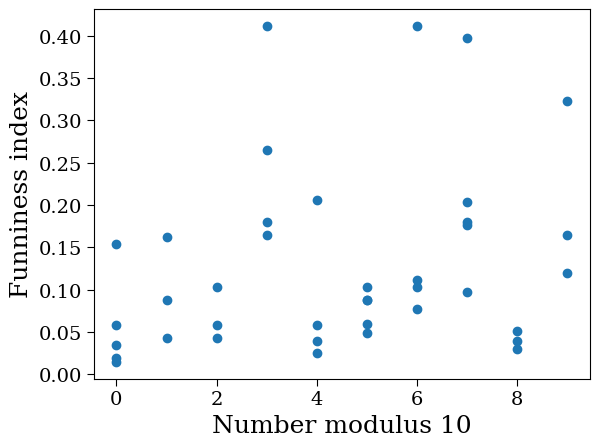

In [54]:
plt.figure();
plt.scatter(x_3035%10, fi_num_30_35, c='C0')
plt.scatter(x_4550%10, fi_num_45_50, c='C0')
plt.scatter(x_6367%10, fi_num_63_67, c='C0')
plt.scatter(x_010%10, fi_num_0_10, c='C0')
plt.scatter(x_7787%10, fi_num_77_87, c='C0')
plt.xlabel("Number modulus 10")
plt.ylabel("Funniness index")
plt.show();

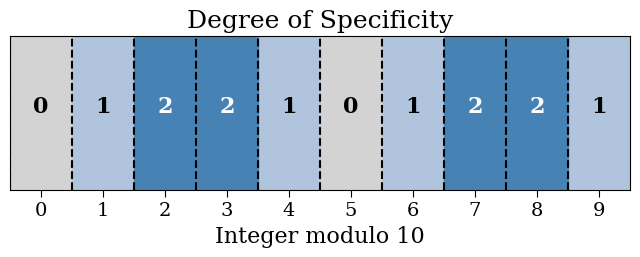

In [55]:
fig = plt.figure(figsize=(8,2))
plt.tight_layout()
plt.plot([])
plt.xlim(-0.5,9.5)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylim([0,1])
plt.yticks([])
plt.xlabel("Integer modulo 10", fontsize=16)
dsc0 = 'lightgray'
dsc1 = 'lightsteelblue'
dsc2 = 'steelblue'
plt.axvspan(-0.5,0.5,color=dsc0)
plt.axvspan(4.5,5.5,color=dsc0)
plt.axvspan(0.5,1.5,color=dsc1)
plt.axvspan(3.5,4.5,color=dsc1)
plt.axvspan(5.5,6.5,color=dsc1)
plt.axvspan(8.5,9.5,color=dsc1)
plt.axvspan(1.5,3.5,color=dsc2)
plt.axvspan(6.5,8.5,color=dsc2)
plt.title("Degree of Specificity", fontsize=18)
for i in range(-1,9):
    plt.axvline(i+0.5, color='black', ls='--');
    
ds_list = [0,1,2,2,1,0,1,2,2,1]
c_list = ['black', 'black', 'white', 'white', 'black', 'black', 'black', 'white', 'white', 'black']
for i in range(0,10):
#     plt.text(i, 0.5, r'+$\,$%i'%ds_list[i], horizontalalignment='center', fontweight='bold', color=c_list[i]);
        plt.text(i, 0.5, ds_list[i], horizontalalignment='center', fontweight='bold', fontsize=16, color=c_list[i]);

# plt.savefig('Plots/deg_of_spec.pdf',bbox_inches='tight')
plt.show();